<b>Case 4 - Millennium BCP
<br>Group H

<br>| Ana Teresa Maia | r20201562 |
<br>| Henrique Falcão | r20201519 |
<br>| Maria Benedita Elias | 20230491 |
<br>| Maria Leonor Gusmão | 20230488 |
<br>| Pedro  Carvalho | 20230487 |


<br>Business Cases for Data Science S2 2023/2024

This Dataset is to be applied for the Processes that just entered their 6th activity.

<a name="top"></a> 
## Notebook Dynamic Index

* [Requirements](#req)
* [General Imports and Setup](#libraries)
* [Dataset Load](#load)
* [Final Preprocessing](#prep)
* [Metric and Non-Metric Feature Split](#metric)
* [Dataset Split (Train and Validation)](#split)
* [Normalization + Encoding](#encoding)
* [Balance Dataset](#smote)
* [Feature Selection](#select)
  * [Final Feature Selection](#selectfin)
* [Baseline Modeling](#base)
* [Model Tunning](#tun)
* [Models Feature Importance](#impot)
* [Train Metrics Comparison](#TRAIN)
* [Validation Implementation](#VAL)
* [Final Model Selection](#fin)
* [Final Model Interpretation](#int)

<a class="anchor" id="req">

### Requirements (packages and versions)
###### [Go back to Contents](#top)
</a>

In [109]:
import pkg_resources

#Get a list of installed packages and their versions
installed_packages = pkg_resources.working_set

#Print package names and versions
for package in installed_packages:
    print(package)

Babel 2.11.0
Brotli 1.0.9
Jinja2 3.1.3
MarkupSafe 2.1.3
PySocks 1.7.1
PyYAML 6.0.1
Pygments 2.15.1
Send2Trash 1.8.2
anyio 4.2.0
argon2-cffi 21.3.0
argon2-cffi-bindings 21.2.0
asttokens 2.0.5
async-lru 2.0.4
attrs 23.1.0
backcall 0.2.0
beautifulsoup4 4.12.2
bleach 4.1.0
category-encoders 2.6.3
certifi 2024.2.2
cffi 1.16.0
charset-normalizer 2.0.4
cloudpickle 3.0.0
colorama 0.4.6
comm 0.2.1
contourpy 1.1.1
cycler 0.12.1
debugpy 1.6.7
decorator 5.1.1
defusedxml 0.7.1
exceptiongroup 1.2.0
executing 0.8.3
fastjsonschema 2.16.2
fonttools 4.52.1
idna 3.7
imbalanced-learn 0.10.1
importlib-metadata 7.0.1
importlib-resources 6.1.1
ipykernel 6.28.0
ipython 8.12.2
jedi 0.18.1
joblib 1.4.2
json5 0.9.6
jsonschema 4.19.2
jsonschema-specifications 2023.7.1
jupyter-client 8.6.0
jupyter-core 5.5.0
jupyter-events 0.8.0
jupyter-lsp 2.2.0
jupyter-server 2.10.0
jupyter-server-terminals 0.4.4
jupyterlab 4.0.11
jupyterlab-pygments 0.1.2
jupyterlab-server 2.25.1
kiwisolver 1.4.5
lightgbm 4.3.0
llvmlite 0.41.1


<a class="anchor" id="libraries">

### General Imports and Setup
###### [Go back to Contents](#top)
</a>

In [110]:
#general imports
import pandas as pd
import numpy as np
from collections import Counter

#For visualizations
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import math
import matplotlib.colors as mcolors

#For better resolution plots
%config InlineBackend.figure_format = 'retina' 

#Setting seaborn style
sns.set()

#To avoid too many warnings in graphs
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

#Split 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

#Balance dataset
from imblearn.combine import SMOTETomek

#Encoding
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler

#Models 
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

<a class="anchor" id="load">

### Dataset Load
###### [Go back to Contents](#top)
</a>

The dataset we will work with under this notebook corresponds to the prefix extraction 6, where processes are entering the 6th activity.

In [111]:
dataset = pd.read_csv('processed_and_transformed_subset_6.csv')

In [112]:
dataset.head(5)

Task arrival date_act1   Task arrival date_act2   Task arrival date_act3  \
0  2022-04-29 09:26:09.583  2022-04-29 09:26:10.410  2022-04-29 16:24:40.140   
1  2022-05-05 12:13:11.703  2022-05-05 12:13:12.187  2022-05-12 14:38:24.817   
2  2022-05-16 17:20:24.983  2022-05-16 17:20:26.627  2022-05-17 11:22:22.387   
3  2022-05-18 10:08:59.030  2022-05-18 10:09:08.170  2022-05-18 12:14:07.533   
4  2022-05-19 15:55:12.623  2022-05-19 15:55:15.170  2022-05-22 17:33:43.727   

    Task arrival date_act4   Task arrival date_act5  Actvity ID_act1  \
0  2022-05-03 14:30:59.680  2022-05-04 09:45:17.197              100   
1  2022-05-12 16:07:54.810  2022-06-29 12:00:18.520              100   
2  2022-05-17 11:58:48.703  2022-05-17 13:43:40.990              100   
3  2022-05-18 12:52:10.403  2022-05-18 13:33:29.900              100   
4  2022-05-23 09:12:15.410  2022-05-23 12:10:27.937              100   

   Actvity ID_act2  Actvity ID_act3  Actvity ID_act4  Actvity ID_act5  ...  \
0              102              103              102              103  ...   
1              102              101              102              103  ...   
2              102              103              102              103  ...   
3              105              101              105              101  ...   
4              102              101              105              106  ...   

  Value_20 Value_100 Value_60 Value_2 Value_40 Value_1 Value_80 Value_90  \
0        2         0        0       0        0       0        0        0   
1        1         0        0       0        0       0        0        0   
2        3         0        0       0        0       0        0        0   
3        0         0        0       0        0       0        0        1   
4        0         0        0       0        0       0        0        1   

  Actvity ID_last_act6 Task arrival date_last_act6  
0                  102     2022-05-04 11:46:38.793  
1                  102     2022-06-29 14:27:43.500  
2                  102     2022-05-21 09:35:32.947  
3                  105     2022-05-18 16:11:41.473  
4                  105     2022-06-03 13:24:46.100  

[5 rows x 106 columns]

In [113]:
# Get column names as a list
column_names = list(dataset.columns)

# Print each column name
for column in column_names:
    print(column)

Task arrival date_act1
Task arrival date_act2
Task arrival date_act3
Task arrival date_act4
Task arrival date_act5
Actvity ID_act1
Actvity ID_act2
Actvity ID_act3
Actvity ID_act4
Actvity ID_act5
Task Executer_act1
Task Executer_act2
Task Executer_act3
Task Executer_act4
Task Executer_act5
Task executer department_act1
Task executer department_act2
Task executer department_act3
Task executer department_act4
Task executer department_act5
Task Type_act1
Task Type_act2
Task Type_act3
Task Type_act4
Task Type_act5
Action_act1
Action_act2
Action_act3
Action_act4
Action_act5
idBPMApplicationAction_act1
idBPMApplicationAction_act2
idBPMApplicationAction_act3
idBPMApplicationAction_act4
idBPMApplicationAction_act5
Period between arrival and execution_act1
Period between arrival and execution_act2
Period between arrival and execution_act3
Period between arrival and execution_act4
Period between arrival and execution_act5
Period between arrival and capture_act1
Period between arrival and capture_

<a class="anchor" id="prep">

### Final preprocessing
###### [Go back to Contents](#top)
</a>

#### Extraction of relevant information

Since columns such as date columns can be too specific to each process, it tends to lead to overfit, as we could see on the Modelling phase. To go around this we will make an extraction of the month day and hour of each process when it entered each activity, reducing this way the danger of overfitting later on.

In [114]:
#List of task arrival date columns
task_arrival_columns = [col for col in dataset.columns if col.startswith('Task arrival date')]

for col in task_arrival_columns:
    #Convert to datetime
    dataset[col] = pd.to_datetime(dataset[col])
    
    #Extract the activity identifier (e.g., act1, act2, last_act3)
    act_identifier = col.split('_')[-1]
    
    #Extract year, month, day, and hour
    dataset[f'Month_{act_identifier}'] = dataset[col].dt.month
    dataset[f'Hour_{act_identifier}'] = dataset[col].dt.hour
    dataset[f'Day_{act_identifier}'] = dataset[col].dt.day

#Drop the original Task arrival date columns
dataset.drop(columns=task_arrival_columns, inplace=True)

#Display the resulting DataFrame
dataset.head()

Actvity ID_act1  Actvity ID_act2  Actvity ID_act3  Actvity ID_act4  \
0              100              102              103              102   
1              100              102              101              102   
2              100              102              103              102   
3              100              105              101              105   
4              100              102              101              105   

   Actvity ID_act5 Task Executer_act1 Task Executer_act2 Task Executer_act3  \
0              103                698               4322              10606   
1              103              10150              Robot              10150   
2              103               6869              Robot              10606   
3              101               6797               9083               6797   
4              106               9296               4322               9296   

  Task Executer_act4 Task Executer_act5  ... Day_act3 Month_act4 Hour_act4  \
0               4322              10606  ...       29          5        14   
1               4960              10606  ...       12          5        16   
2              Robot              10606  ...       17          5        11   
3               9083               6797  ...       18          5        12   
4              10027                507  ...       22          5         9   

  Day_act4 Month_act5 Hour_act5 Day_act5 Month_act6 Hour_act6 Day_act6  
0        3          5         9        4          5        11        4  
1       12          6        12       29          6        14       29  
2       17          5        13       17          5         9       21  
3       18          5        13       18          5        16       18  
4       23          5        12       23          6        13        3  

[5 rows x 118 columns]

We also noticed that datatypes no longer are correctly representing each feature type. As so we corrected them:

In [115]:
# Set pandas to display all columns in info
pd.set_option('display.max_info_columns', 100)  # Adjust number as needed

# Display detailed info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Columns: 118 entries, Actvity ID_act1 to Day_act6
dtypes: int32(18), int64(75), object(25)
memory usage: 722.2+ KB


In [116]:
#List of prefixes to match columns
prefixes = ['idField', 'Actvity ID', 'idBPMApplicationAction', 'Role ID', 'Actvity ID_last', 'Month', 'Hour', 'Day']

#Identifying columns to convert
columns_to_convert = [col for col in dataset.columns if any(col.startswith(prefix) for prefix in prefixes)]

#Converting the specified columns to 'object' type
dataset[columns_to_convert] = dataset[columns_to_convert].astype('object')

Datatypes are correct:

In [117]:
#Set pandas to display all columns in info
pd.set_option('display.max_info_columns', 100)  # Adjust number as needed

#Display detailed info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Columns: 118 entries, Actvity ID_act1 to Day_act6
dtypes: int64(48), object(70)
memory usage: 781.9+ KB


In [118]:
#These copies are made to ensure safety to comeback later on if any undesired change was performed.
final_df=dataset.copy()

In [119]:
#To unsure we dont have any strange value we will check the variables unique values 
for column in final_df.columns:
    unique_values = final_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  

Unique values in column 'Actvity ID_act1':
[100]

Unique values in column 'Actvity ID_act2':
[102 105]

Unique values in column 'Actvity ID_act3':
[103 101 106 102 108 104]

Unique values in column 'Actvity ID_act4':
[102 105 104 103 108 101 107]

Unique values in column 'Actvity ID_act5':
[103 101 106 107 104 102]

Unique values in column 'Task Executer_act1':
['698' '10150' '6869' '6797' '9296' '107' '10993' '7341' '1537' '7730'
 '1851' '11183' '935' '8303' '869' '334' '11115' '8751' '7847' '706' '600'
 '631' '1726' '10392' '1001' '10929' '9029' '52' '1020' '1006' '9391'
 '7579' '8239' '10595' '461' '1591' '533' '309' '924' '10812' '11236'
 '10919' '9851' '10845' '7738' '3' '8559' '11140' '11114' '10630' '880'
 '397' '9650' '252' '447' '9609' '8270' '6977' '510' '1752' 'Robot' '7284'
 '685' '609' '8867' '10340' '9910' '11333' '1014' '11224' '8445' '10053'
 '1212' '8048' '425' '10285' '308' '10269' '8608' '960' '1073' '354'
 '10456' '10080' '10930' '9815' '10469' '647' '730' '57' '110

All values are logically fine.

<a class="anchor" id="metric">

### Metric and Non-Metric Feature Split
###### [Go back to Contents](#top)
</a>

In [120]:
#Extracting metric and non-metric features 

#List to store metric features
metric_features = []

#List to store non-metric features
non_metric_features = []

#Iterate through columns 
for column in final_df.columns:
    if column != 'Target':  #Exclude the target column
        if column.startswith(('Period between arrival and execution', 
                              'Period between arrival and capture',   
                              'Overdue Days', 
                              'Age', 
                              'Years in Org Position',
                              'NumberOfFemales',
                              'NumberOfManagers',
                              'NumberOfOutsourcers',
                              'NumberOfRejections',
                              'Value',
                              'Cumulative Length of Process')):
            metric_features.append(column)
        else:
            non_metric_features.append(column)

In [121]:
#Print the lists of metric and non-metric features
print("Metric Features:")
for feature in metric_features:
    print(feature)

print("\nNon-Metric Features:")
for feature in non_metric_features:
    print(feature)

Metric Features:
Period between arrival and execution_act1
Period between arrival and execution_act2
Period between arrival and execution_act3
Period between arrival and execution_act4
Period between arrival and execution_act5
Period between arrival and capture_act1
Period between arrival and capture_act2
Period between arrival and capture_act3
Period between arrival and capture_act4
Period between arrival and capture_act5
Cumulative Length of Process_act1
Cumulative Length of Process_act2
Cumulative Length of Process_act3
Cumulative Length of Process_act4
Cumulative Length of Process_act5
Overdue Days_act1
Overdue Days_act2
Overdue Days_act3
Overdue Days_act4
Overdue Days_act5
Years in Org Position_act1
Years in Org Position_act2
Years in Org Position_act3
Years in Org Position_act4
Years in Org Position_act5
Age_act1
Age_act2
Age_act3
Age_act4
Age_act5
NumberOfFemales
NumberOfManagers
NumberOfOutsourcers
NumberOfRejections
Value Count
Value_10
Value_50
Value_30
Value_70
Value_20
Valu

In [122]:
#List with all column names from final_df to latter use this columns to normalize them
all_features = final_df.columns.tolist()
all_features.remove('Target')

<a class="anchor" id="split">

### Dataset Split (Train and Validation)
###### [Go back to Contents](#top)
</a>

In order to evaluate our work with relevant metrics, we did the train-val split. Since we dont have that many examples (processes) we decided to use cross validation further ahead to go over the fact of not having a separate test set and yet try to achieve accurate results.

In [123]:
data_split = final_df.copy()

In [124]:
X = data_split.drop('Target', axis = 1)
target_multiclass = data_split['Target']

We are setting the stratify parameter to ensure that the target classes mantain the same distribution for the train and validation dataset

In [125]:
#Split the data into train and validation
#20% of the dataset was allocated to the validation set 

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  target_multiclass,
                                                  test_size = 0.2,
                                                  random_state = 42,
                                                  stratify = target_multiclass,
                                                  shuffle = True)

Now we can see that our dataset is imbalanced, meaning that we have target classes with much more examples associated to it than others. Target variable 3 has 40% of represantation in the entire dataset. Latter we will apply techniques to try to overcome this problem to still have a good predictive performance accross all possible outcomes. 

In [126]:
#Get the percentage of each target value in the train dataset
percentage_per_class = y_train.value_counts(normalize=True) * 100

#Display the percentage of each target value
print("Percentage of each target value in the train dataset:")
print(percentage_per_class)

Percentage of each target value in the train dataset:
Target
3    39.823009
1    28.466077
2    24.631268
0     7.079646
Name: proportion, dtype: float64


In [127]:
y_train.value_counts()

Target
3    270
1    193
2    167
0     48
Name: count, dtype: int64

In [128]:
#Get the percentage of each target value in the val dataset
percentage_per_class = y_val.value_counts(normalize=True) * 100

#Display the percentage of each target value
print("Percentage of each target value in the validation dataset:")
print(percentage_per_class)

Percentage of each target value in the validation dataset:
Target
3    40.000000
1    28.235294
2    24.705882
0     7.058824
Name: proportion, dtype: float64


We just checked that the target variable keeped more or less the same distribution for train and validation set.

<a class="anchor" id="encoding">

#### Normalization + Encoding
###### [Go back to Contents](#top)
</a>

We perform this step only after the split to avoid data leakage.

Target encoding inputes the percentage of likelihood of having a certain category in each target, transforming non-metric features in metric features. Unlike, One-hot encoding, it will allow us to keep the same number of columns that we already have. This way we can avoid better the curse of dimensionality.

In [129]:
X_train_unscalled = X_train.copy()

In [130]:
X_val_unscalled = X_val.copy

In [131]:
#Target encoding for Train and Validation
encoder = ce.TargetEncoder(handle_missing = 'return_nan')

#Iterate through the non-metric features
for column in non_metric_features:
    encoder.fit(X_train[[column]], y_train)

    X_train[column] = encoder.transform(X_train[[column]])
    X_val[column] = encoder.transform(X_val[[column]])

Normalization allows to standardize the impact each feature has on the target by removing the magnitude effect each variable held itself.

In [132]:
scaler = MinMaxScaler()

#Iterate through the metric features
for column in all_features:
    scaler.fit(X_train[[column]])

    X_train[column] = scaler.transform(X_train[[column]])
    X_val[column] = scaler.transform(X_val[[column]])

Ensuring that all variables are between 0 and 1 to overcome the problem of having different scales. When that is the case, our models can give more importance to variables with larger scale.

In [133]:
#Set display options to show all columns
pd.set_option('display.max_rows', None)

#Ensuring that all variables of the dataset are between 0 and 1 
pd.concat([X_train.min().round(3), X_train.max().round(1)], axis = 1, keys = ['Minimum Value', 'Maximum Value'])

Minimum Value  Maximum Value
Actvity ID_act1                                      0.0            0.0
Actvity ID_act2                                      0.0            1.0
Actvity ID_act3                                      0.0            1.0
Actvity ID_act4                                      0.0            1.0
Actvity ID_act5                                      0.0            1.0
Task Executer_act1                                   0.0            1.0
Task Executer_act2                                   0.0            1.0
Task Executer_act3                                   0.0            1.0
Task Executer_act4                                   0.0            1.0
Task Executer_act5                                   0.0            1.0
Task executer department_act1                        0.0            1.0
Task executer department_act2                        0.0            1.0
Task executer department_act3                        0.0            1.0
Task executer department_act4                        0.0            1.0
Task executer department_act5                        0.0            1.0
Task Type_act1                                       0.0            0.0
Task Type_act2                                       0.0            0.0
Task Type_act3                                       0.0            1.0
Task Type_act4                                       0.0            1.0
Task Type_act5                                       0.0            1.0
Action_act1                                          0.0            0.0
Action_act2                                          0.0            1.0
Action_act3                                          0.0            1.0
Action_act4                                          0.0            1.0
Action_act5                                          0.0            1.0
idBPMApplicationAction_act1                          0.0            0.0
idBPMApplicationAction_act2                          0.0            1.0
idBPMApplicationAction_act3                          0.0            1.0
idBPMApplicationAction_act4                          0.0            1.0
idBPMApplicationAction_act5                          0.0            1.0
Period between arrival and execution_act1            0.0            0.0
Period between arrival and execution_act2            0.0            1.0
Period between arrival and execution_act3            0.0            1.0
Period between arrival and execution_act4            0.0            1.0
Period between arrival and execution_act5            0.0            1.0
Period between arrival and capture_act1              0.0            0.0
Period between arrival and capture_act2              0.0            1.0
Period between arrival and capture_act3              0.0            1.0
Period between arrival and capture_act4              0.0            1.0
Period between arrival and capture_act5              0.0            1.0
Cumulative Length of Process_act1                    0.0            0.0
Cumulative Length of Process_act2                    0.0            0.0
Cumulative Length of Process_act3                    0.0            0.0
Cumulative Length of Process_act4                    0.0            0.0
Cumulative Length of Process_act5                    0.0            0.0
Overdue Days_act1                                    0.0            0.0
Overdue Days_act2                                    0.0            1.0
Overdue Days_act3                                    0.0            1.0
Overdue Days_act4                                    0.0            1.0
Overdue Days_act5                                    0.0            1.0
Role ID_act1                                         0.0            1.0
Role ID_act2                                         0.0            1.0
Role ID_act3                                         0.0            1.0
Role ID_act4                                         0.0            1.0
Role ID_act5                                         0.0            1.0
Years in Or

<a class="anchor" id="smote">

#### Balance Dataset
###### [Go back to Contents](#top)
</a>

This notebook is a version of the notebook_3_FINAL but without the Smote Tomek Implementation. In this notebook, to overcome the class imbalance we are going to use the parameter class_weights=balanced in the models that have it to account for the different classes distribution.
When this parameter is used the model adjusts the weights of each class inversely proportional to their frequencies in the training data. This means that the minority class will be given more weight, and the majority class will be given less weight, aiming to balance the impact of each class on the model's learning process.

In [134]:
X_smote=X_train.copy()
y_smote=y_train.copy()

In [135]:
y_smote.value_counts()

Target
3    270
1    193
2    167
0     48
Name: count, dtype: int64

<a class="anchor" id="select">

#### Feature Selection
###### [Go back to Contents](#top)
</a>

In the process of doing the modelling phase in this notebook, we noticed that our models were significantly overfitting, after a some time searching for the probelm, we reached the conclusion that this were the variables causing the overfit, since they are very specific for each row. Because of this we decided to remove them.

In [136]:
# Define the prefixes
prefixes = ['Task Executer', 'Task executer', 'Role','Day','Hour', 'Month', 'Age', 'Role', 'Years in Org Position','Overdue Days']

# Function to get the list of columns to drop
def get_columns_to_drop(df, prefixes):
    return [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes)]

cols_to_drop_smote = get_columns_to_drop(X_smote, prefixes)
cols_to_drop_val = get_columns_to_drop(X_val, prefixes)
cols_to_drop_train = get_columns_to_drop(X_train, prefixes)

# Drop the columns
X_smote = X_smote.drop(columns=cols_to_drop_smote)
X_val = X_val.drop(columns=cols_to_drop_val)
X_train = X_train.drop(columns=cols_to_drop_train) #We dropped this columns before any filter selection method as by experience we believe that they are 
#causing  a significant overfit

### 1. Features Variance 

Firstly, we are going to check the variance of the features. If the variance is equal to zero, the features will be removed, since its not adding any information to the model, it does not allow the model to discriminate between examples 

In [137]:
#Univariate variables: Check the variance of each feature
variance_values = X_smote.var().round(10)*100
print(variance_values)

Actvity ID_act1                               0.000000
Actvity ID_act2                               3.556598
Actvity ID_act3                              16.598401
Actvity ID_act4                              11.326814
Actvity ID_act5                              10.579179
Task Type_act1                                0.000000
Task Type_act2                                0.000000
Task Type_act3                               19.459658
Task Type_act4                                7.888150
Task Type_act5                               14.697529
Action_act1                                   0.000000
Action_act2                                  24.058945
Action_act3                                  19.812013
Action_act4                                  20.939354
Action_act5                                  25.005555
idBPMApplicationAction_act1                   0.000000
idBPMApplicationAction_act2                  14.736946
idBPMApplicationAction_act3                  15.479089
idBPMAppli

In [138]:
#List of variables to eliminate
variance_eliminate = variance_values[variance_values == 0].index.tolist()
variance_eliminate

['Actvity ID_act1',
 'Task Type_act1',
 'Task Type_act2',
 'Action_act1',
 'idBPMApplicationAction_act1',
 'Period between arrival and execution_act1',
 'Period between arrival and capture_act1',
 'Cumulative Length of Process_act1',
 'Cumulative Length of Process_act2',
 'Cumulative Length of Process_act3',
 'Cumulative Length of Process_act4',
 'Cumulative Length of Process_act5',
 'idBPMRequirement_act1',
 'idBPMRequirement_act5',
 'idField_203',
 'idField_3486',
 'idField_3388']

In [139]:
#Dropping them already 
X_smote.drop(columns=variance_eliminate, inplace=True)
X_val.drop(columns=variance_eliminate, inplace=True)

### Correlation Matrices 

We are going to see the correlation between independent features (X), if there are 2 features highly correlated (bigger than 0.8) we are going to eliminate the one that has the lowest correlation with the target. Because of this, we will eliminate redundant information and irrelevant information as well. On top of this we eliminate the features that have low correlation with the target (bellow 0.05) since they will not add much to predict our problem.

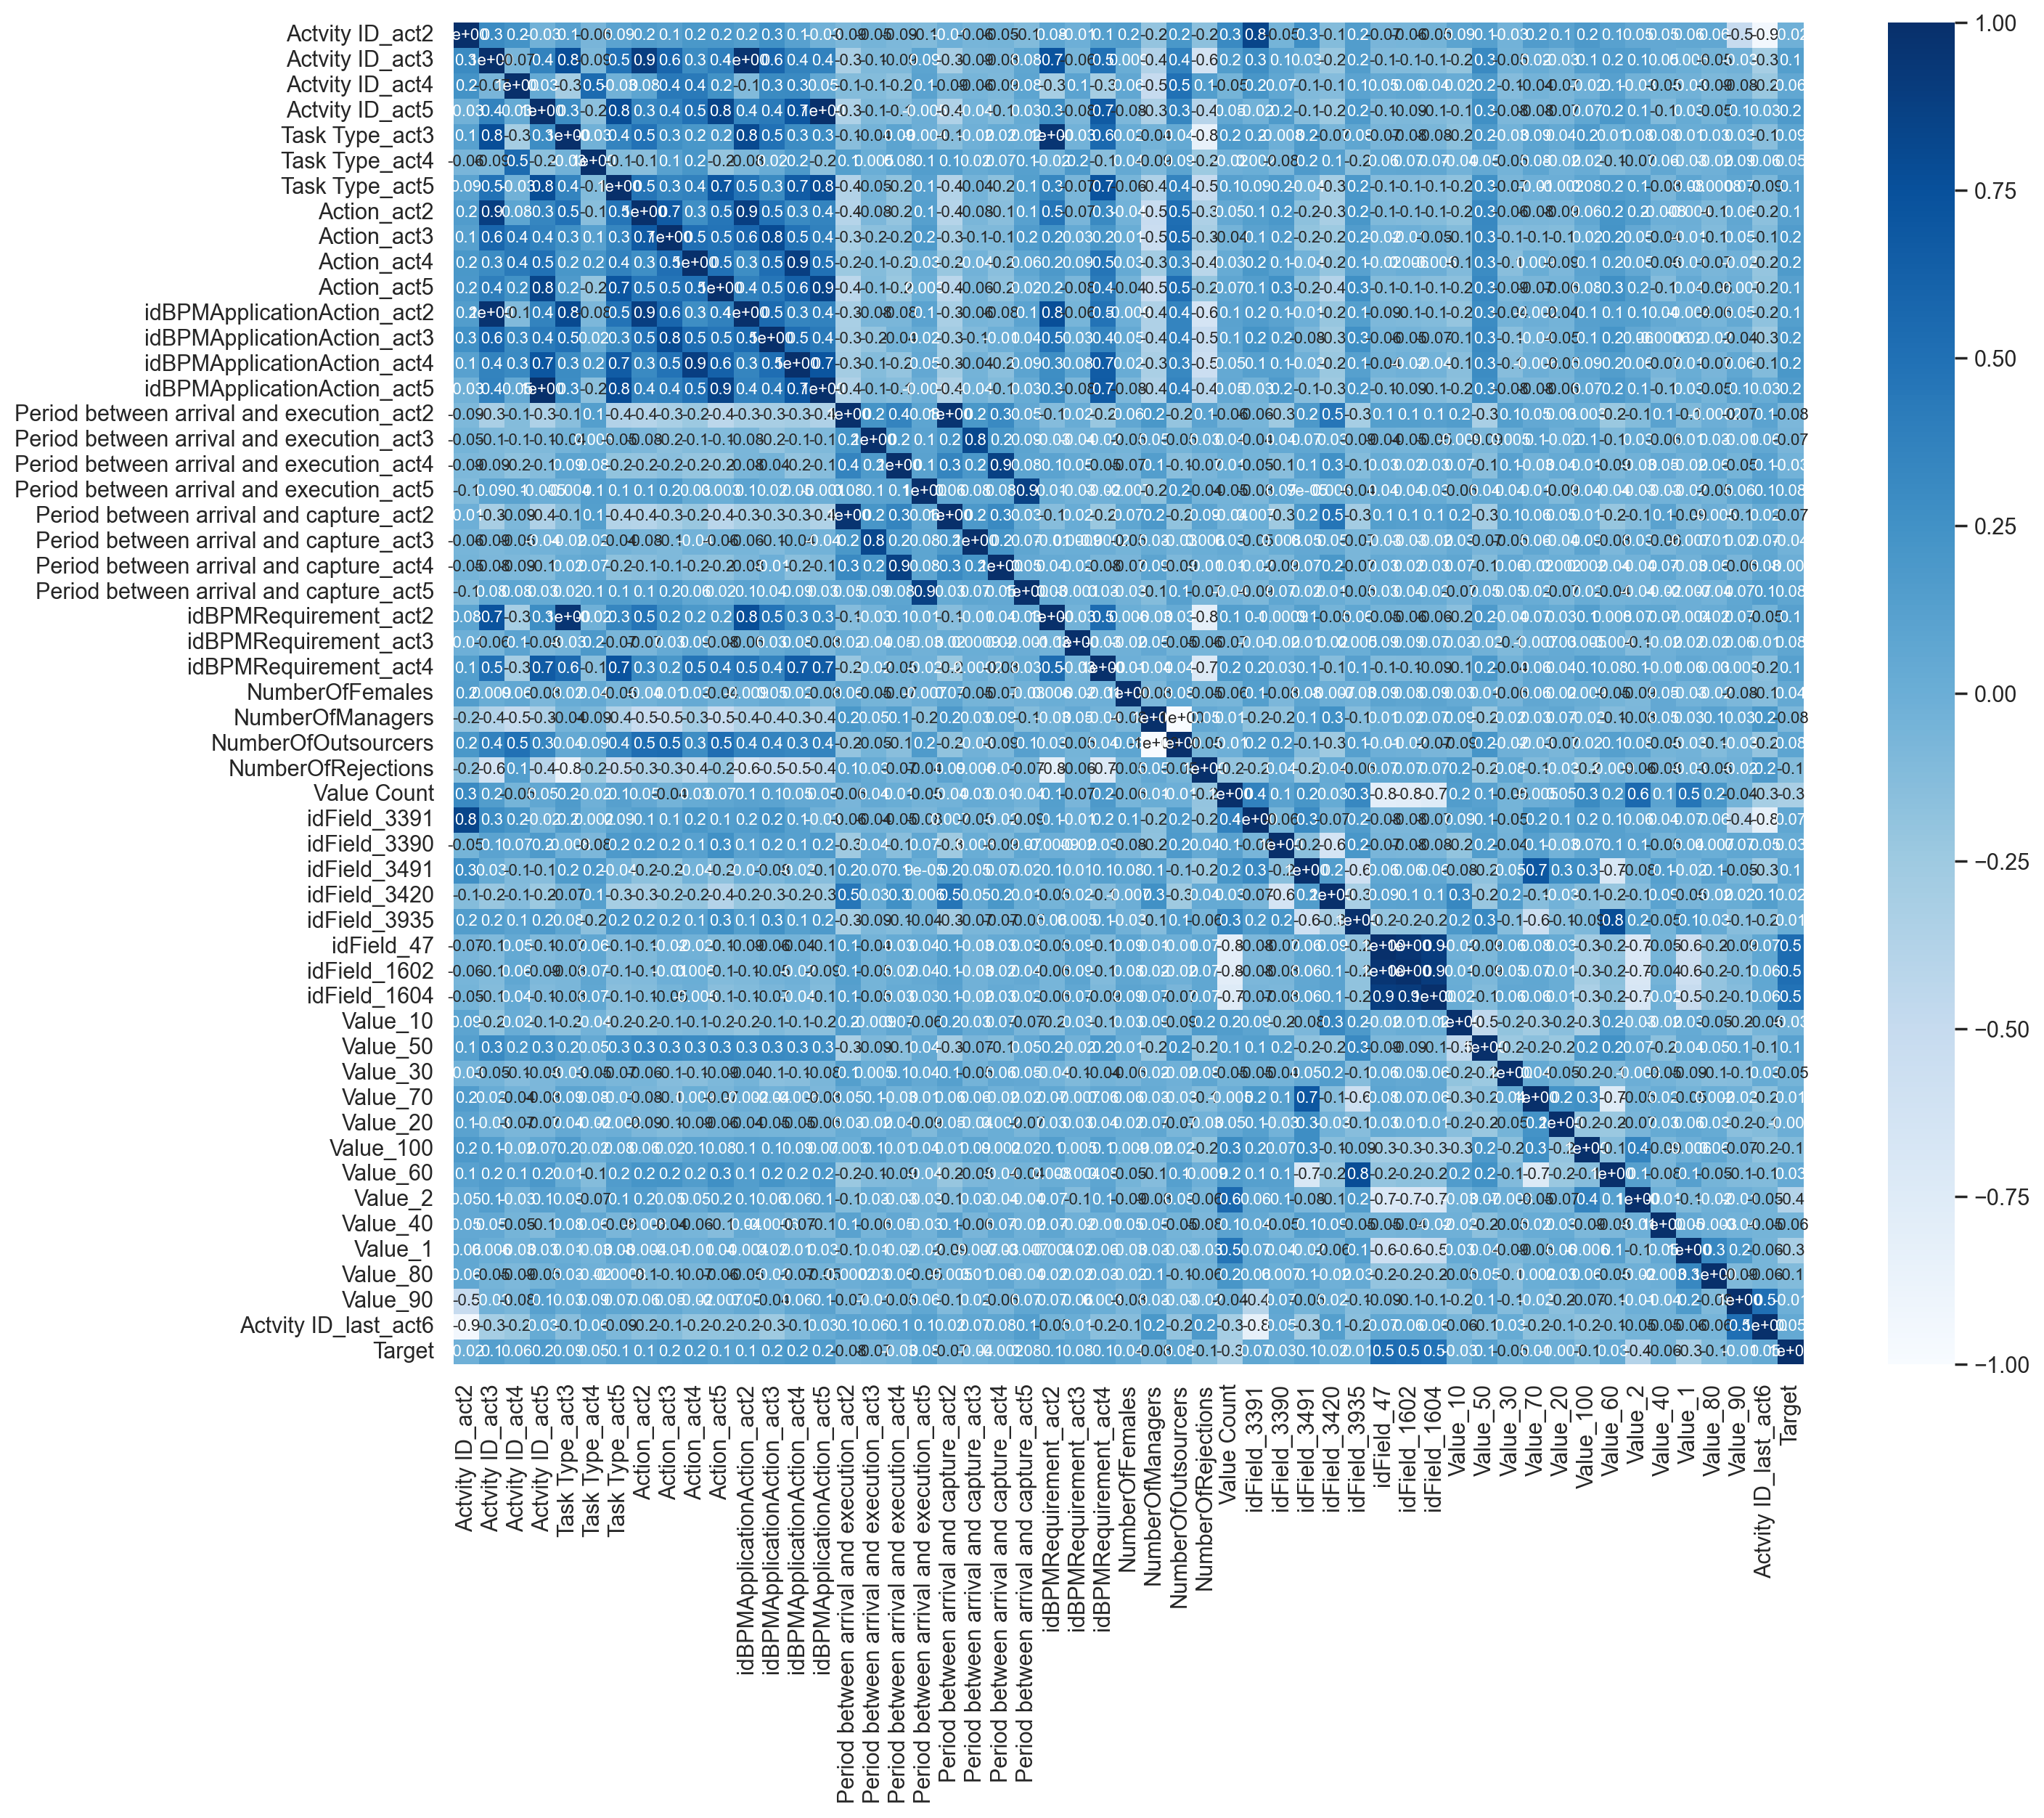

In [140]:
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1', annot_kws = {"size": 8})
    plt.show()

#Check Spearman Correlation
correlation_features = pd.concat([X_smote, y_smote], axis=1)
cor_spearman = correlation_features.corr(method ='spearman')

cor_heatmap(cor_spearman)

In [141]:
#Get correlation matrix for features only (excluding the Target)
feature_corr = cor_spearman.loc[X_smote.columns, X_smote.columns]

#List to keep track of features to eliminate
spearman_eliminate = []

#Iterate over each column and find highly correlated pairs
for i in range(len(feature_corr.columns)):
    for j in range(i):
        if abs(feature_corr.iloc[i, j]) > 0.8:  #Check high correlation
            col_i = feature_corr.columns[i]
            col_j = feature_corr.columns[j]
            target_corr_i = abs(cor_spearman.loc[col_i, 'Target'])
            target_corr_j = abs(cor_spearman.loc[col_j, 'Target'])
            #Eliminate the feature with lower correlation to the target
            if target_corr_i < target_corr_j:
                spearman_eliminate.append(col_i)
            else:
                spearman_eliminate.append(col_j)

#Remove duplicates from the elimination list
spearman_eliminate = list(set(spearman_eliminate))

#Eliminate features with low correlation to the target variable
for col in X_smote.columns:
    if abs(cor_spearman.loc[col, 'Target']) < 0.05:
        spearman_eliminate.append(col)

#Remove duplicates again in case some features are added twice
spearman_eliminate = list(set(spearman_eliminate))

#List of features to eliminate
print("Features to eliminate:", spearman_eliminate)

#Remaining features after elimination
remaining_features = [col for col in X_smote.columns if col not in spearman_eliminate]
print("Remaining features:", remaining_features)

Features to eliminate: ['Value_70', 'Period between arrival and execution_act4', 'Actvity ID_act2', 'NumberOfManagers', 'Value_90', 'Action_act2', 'idField_3935', 'Value_30', 'Value_60', 'idField_1602', 'idField_3420', 'idBPMApplicationAction_act5', 'Action_act5', 'Period between arrival and capture_act2', 'Period between arrival and capture_act3', 'Period between arrival and capture_act4', 'Task Type_act3', 'idField_3390', 'idField_1604', 'Value_20', 'Value_10', 'Period between arrival and capture_act5', 'idBPMApplicationAction_act2', 'Actvity ID_last_act6', 'idBPMRequirement_act2', 'Action_act4', 'NumberOfFemales']
Remaining features: ['Actvity ID_act3', 'Actvity ID_act4', 'Actvity ID_act5', 'Task Type_act4', 'Task Type_act5', 'Action_act3', 'idBPMApplicationAction_act3', 'idBPMApplicationAction_act4', 'Period between arrival and execution_act2', 'Period between arrival and execution_act3', 'Period between arrival and execution_act5', 'idBPMRequirement_act3', 'idBPMRequirement_act4',

### RFE 

We are going to use RFE to identify the most important features for our model. The process involves recursively training the model with subsets of features, removing the least important features at each iteration until the desired number of features is reached (based on the model's performance, using f1-score on the validation dataset)

In [142]:
nof_list = np.arange(2, len(X_train.columns) + 1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state = 42)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    X_train_rfe = rfe.fit_transform(X_smote, y_smote)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_smote)

    #Storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_smote, train_pred, average='weighted')
    train_score_list.append(train_score)

    #Storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred, average='weighted')
    val_score_list.append(val_score)

    #Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 34
Score with 34 features: 0.785551


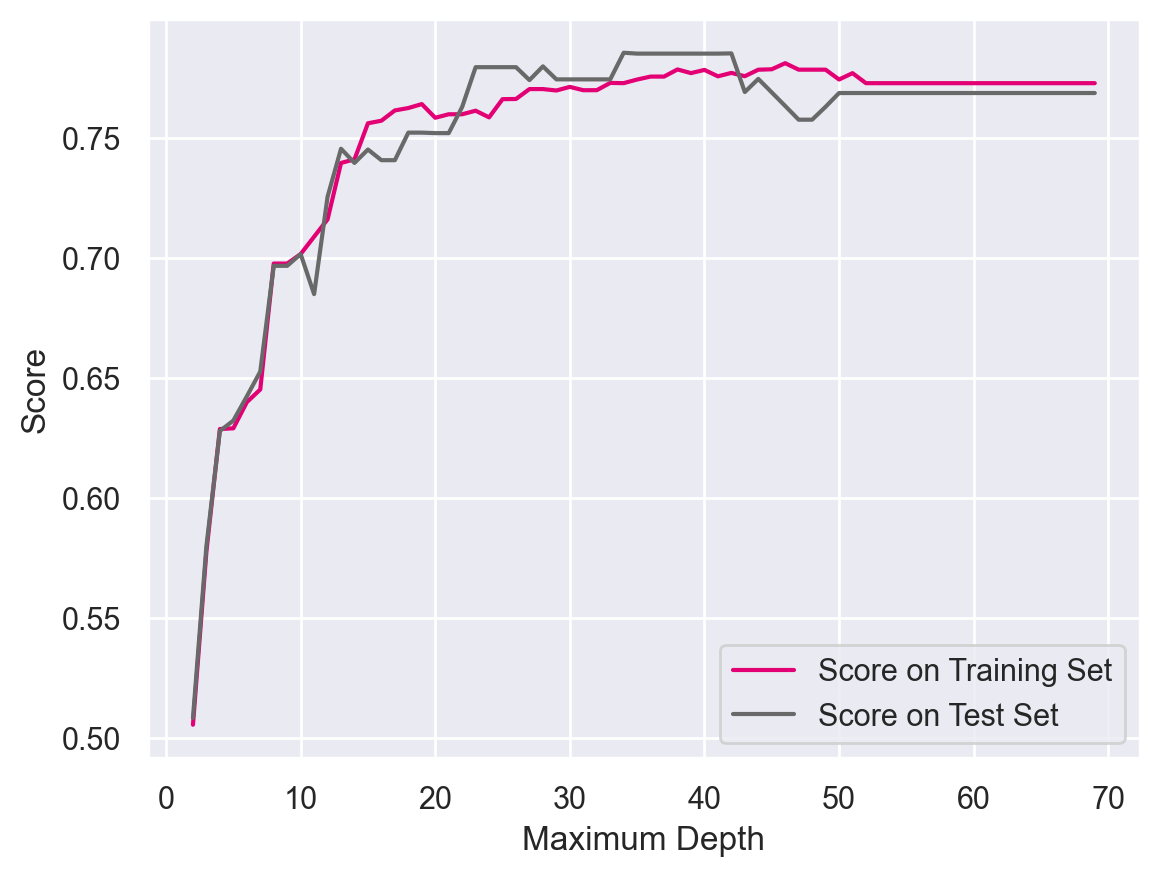

In [143]:
#Plotting the score on train and on validation to help us choose the desired number of features
plt.plot(list(range(2, len(X_train.columns) + 1)), train_score_list, label = "Score on Training Set", color = "#E20074")
plt.plot(list(range(2, len(X_train.columns) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

We have chosen 8 features since we are trying to maxime the f1-score on the validation set and minimize the difference in the score of the val to the train set (minimize overfitting)

In [144]:
#Fitting the model again, but now with the desired number of features 
model = LogisticRegression(random_state=42)
rfe = RFE(estimator = model, n_features_to_select = 8)

X_rfe = rfe.fit_transform(X_smote, y_smote)

In [145]:
#Evaluate what columns should we keep based on RFE
pd.Series(rfe.support_, index = X_smote.columns)

Actvity ID_act2                              False
Actvity ID_act3                              False
Actvity ID_act4                              False
Actvity ID_act5                              False
Task Type_act3                               False
Task Type_act4                               False
Task Type_act5                               False
Action_act2                                  False
Action_act3                                  False
Action_act4                                  False
Action_act5                                  False
idBPMApplicationAction_act2                  False
idBPMApplicationAction_act3                  False
idBPMApplicationAction_act4                  False
idBPMApplicationAction_act5                  False
Period between arrival and execution_act2    False
Period between arrival and execution_act3    False
Period between arrival and execution_act4    False
Period between arrival and execution_act5    False
Period between arrival and capt

In [146]:
#List with features to eliminate
rfe_eliminate = []
rfe_dataset = pd.Series(rfe.support_, index = X_smote.columns)

for index, value in rfe_dataset.items():
    if not value:
        rfe_eliminate.append(index)

In [147]:
rfe_eliminate

['Actvity ID_act2',
 'Actvity ID_act3',
 'Actvity ID_act4',
 'Actvity ID_act5',
 'Task Type_act3',
 'Task Type_act4',
 'Task Type_act5',
 'Action_act2',
 'Action_act3',
 'Action_act4',
 'Action_act5',
 'idBPMApplicationAction_act2',
 'idBPMApplicationAction_act3',
 'idBPMApplicationAction_act4',
 'idBPMApplicationAction_act5',
 'Period between arrival and execution_act2',
 'Period between arrival and execution_act3',
 'Period between arrival and execution_act4',
 'Period between arrival and execution_act5',
 'Period between arrival and capture_act3',
 'Period between arrival and capture_act4',
 'Period between arrival and capture_act5',
 'idBPMRequirement_act2',
 'idBPMRequirement_act3',
 'idBPMRequirement_act4',
 'NumberOfFemales',
 'NumberOfManagers',
 'NumberOfOutsourcers',
 'NumberOfRejections',
 'idField_3391',
 'idField_3390',
 'idField_3420',
 'idField_3935',
 'idField_1604',
 'Value_10',
 'Value_30',
 'Value_70',
 'Value_20',
 'Value_100',
 'Value_2',
 'Value_40',
 'Value_1',
 

### Lasso

Lasso helps us pick the most important features for our model. It squeezes out less useful features by making their effects smaller, while keeping the important ones.

In [148]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [150]:
reg = LassoCV()
reg.fit(X_smote, y_smote)

coef = pd.Series(reg.coef_, index = X_smote.columns).round(6)
coef

Actvity ID_act2                             -0.000000
Actvity ID_act3                              0.407004
Actvity ID_act4                              0.000000
Actvity ID_act5                              0.369860
Task Type_act3                              -0.125349
Task Type_act4                              -0.000000
Task Type_act5                               0.000000
Action_act2                                  0.000000
Action_act3                                 -0.000000
Action_act4                                  0.145127
Action_act5                                  0.000000
idBPMApplicationAction_act2                  0.000000
idBPMApplicationAction_act3                  0.131773
idBPMApplicationAction_act4                  0.037869
idBPMApplicationAction_act5                  0.000000
Period between arrival and execution_act2   -0.000000
Period between arrival and execution_act3   -0.000000
Period between arrival and execution_act4    0.000000
Period between arrival and e

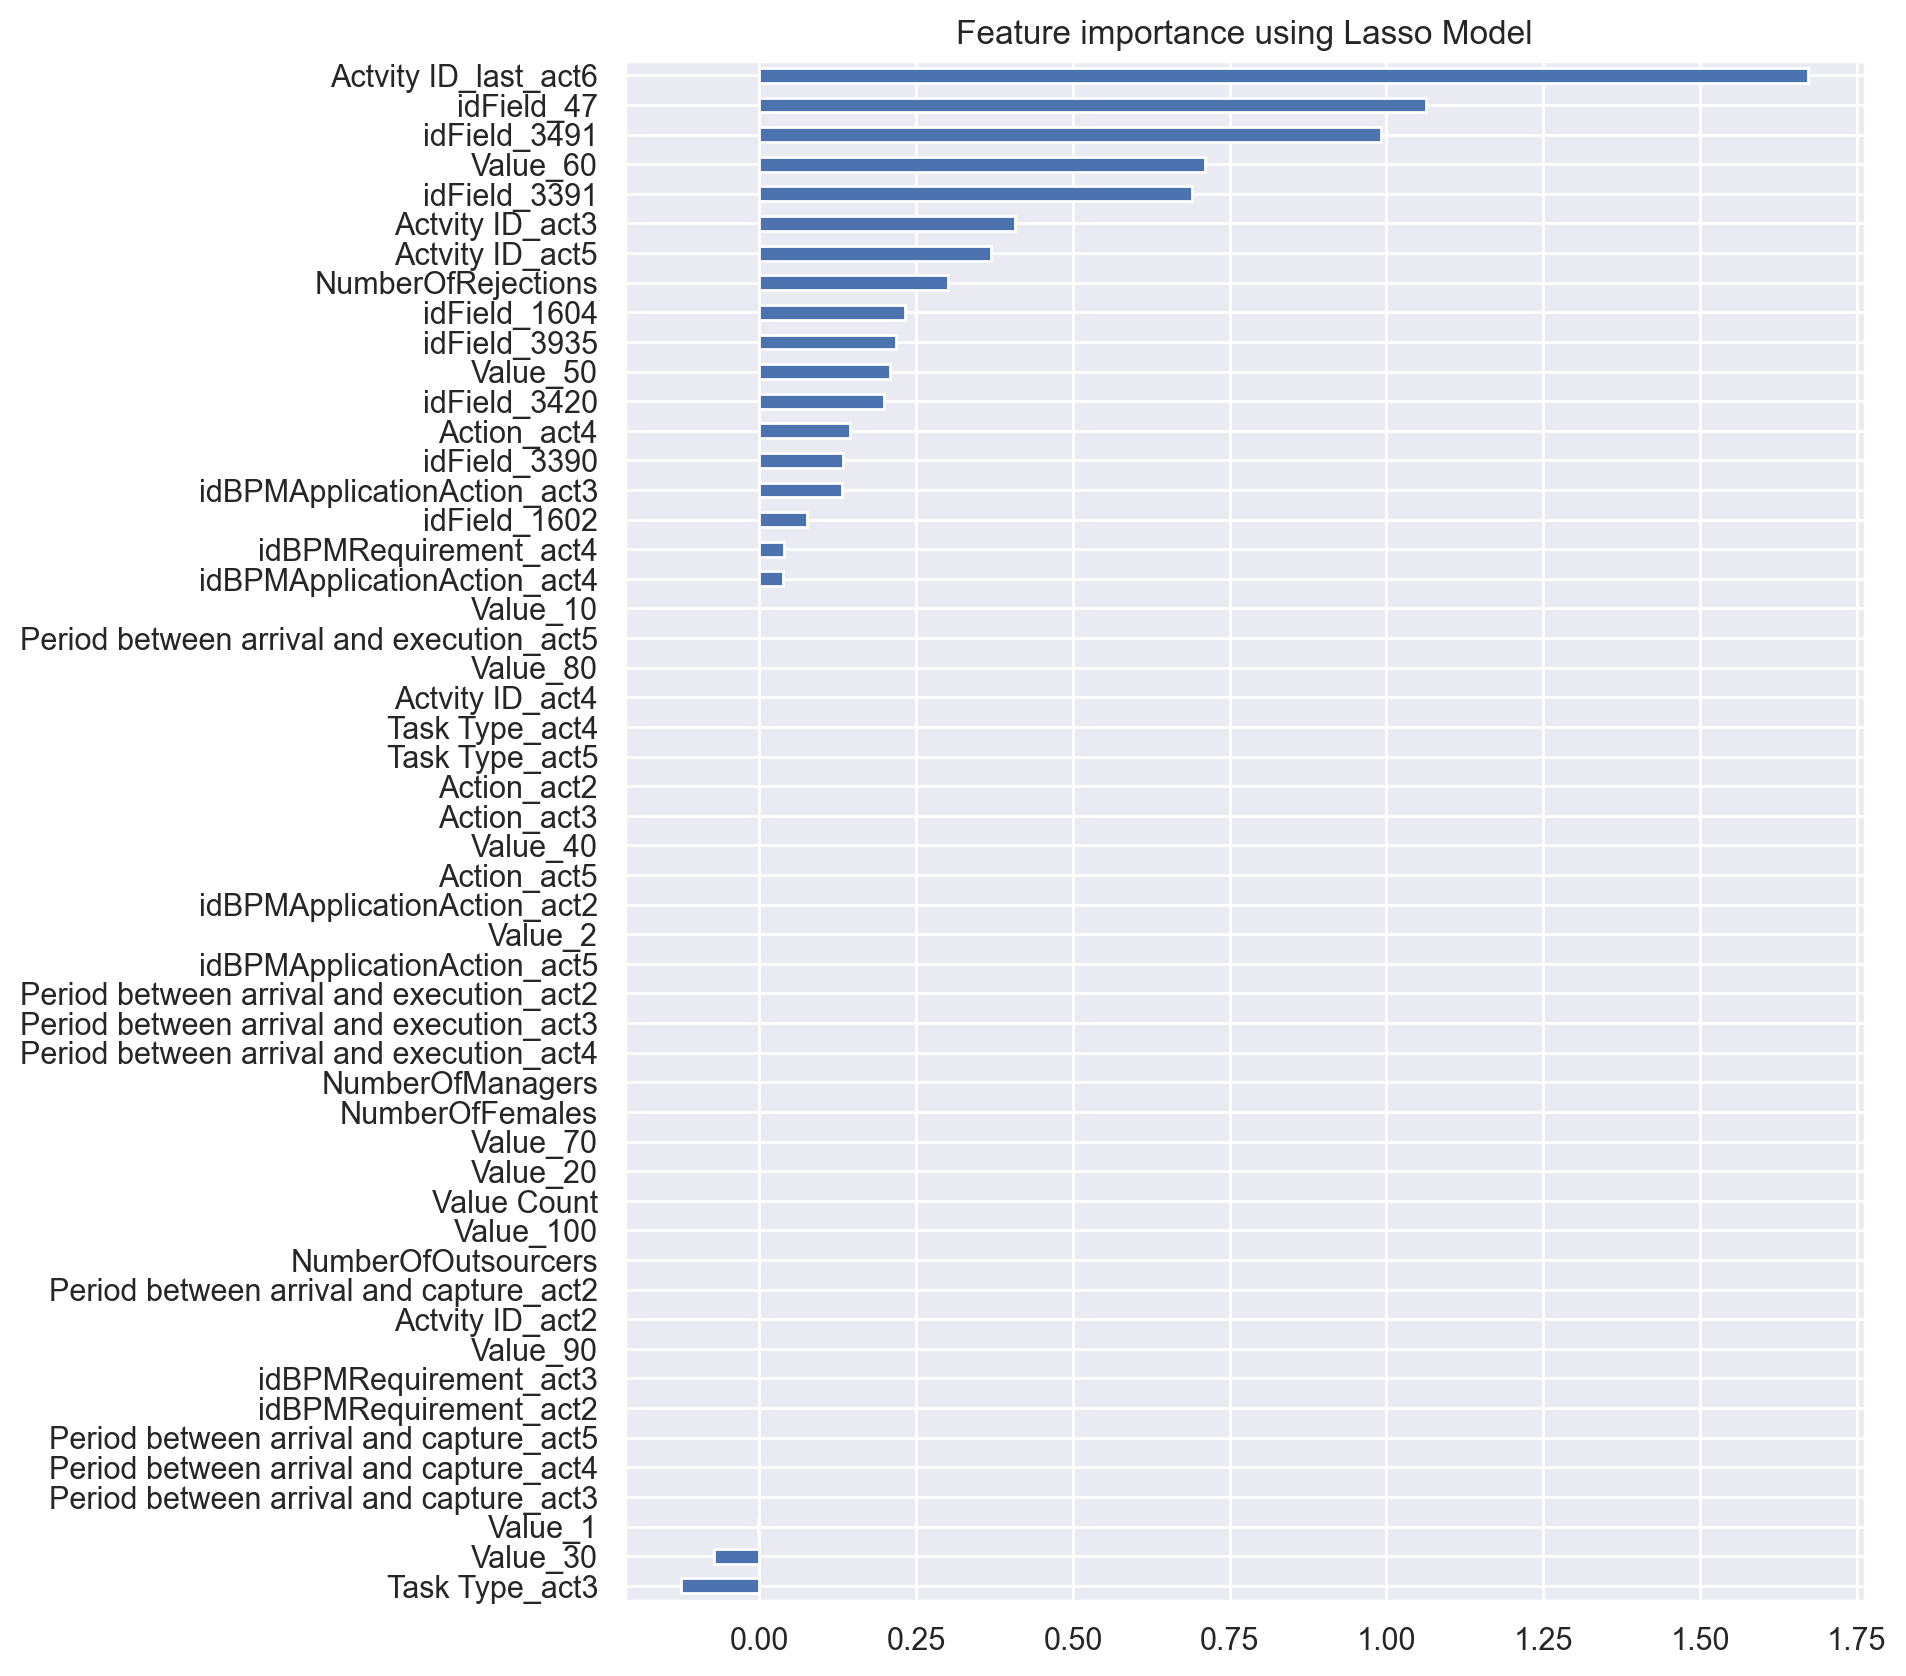

In [151]:
#Feature importance for the model prediction
plot_importance(coef,'Lasso')

In [152]:
#Variables to eliminate using Lasso 
selected_variables = (coef >= -0.1) & (coef <= 0.1)
lasso_eliminate = coef.index[selected_variables].tolist()

print("Variables to eliminate with Lasso:", lasso_eliminate)

Variables to eliminate with Lasso: ['Actvity ID_act2', 'Actvity ID_act4', 'Task Type_act4', 'Task Type_act5', 'Action_act2', 'Action_act3', 'Action_act5', 'idBPMApplicationAction_act2', 'idBPMApplicationAction_act4', 'idBPMApplicationAction_act5', 'Period between arrival and execution_act2', 'Period between arrival and execution_act3', 'Period between arrival and execution_act4', 'Period between arrival and execution_act5', 'Period between arrival and capture_act2', 'Period between arrival and capture_act3', 'Period between arrival and capture_act4', 'Period between arrival and capture_act5', 'idBPMRequirement_act2', 'idBPMRequirement_act3', 'idBPMRequirement_act4', 'NumberOfFemales', 'NumberOfManagers', 'NumberOfOutsourcers', 'Value Count', 'idField_1602', 'Value_10', 'Value_30', 'Value_70', 'Value_20', 'Value_100', 'Value_2', 'Value_40', 'Value_1', 'Value_80', 'Value_90']


### Decision Tree

Decision Trees work by recursively splitting the data based our features, aiming to create clear and interpretable rules that capture the patterns in our dataset. The feature importances obtained from a Decision Tree tell us how much each feature contributes to the decision-making process. 

Actvity ID_act2: 0.014
Actvity ID_act3: 0.019
Actvity ID_act4: 0.005
Actvity ID_act5: 0.023
Task Type_act3: 0.0
Task Type_act4: 0.0
Task Type_act5: 0.0
Action_act2: 0.0
Action_act3: 0.006
Action_act4: 0.0
Action_act5: 0.0
idBPMApplicationAction_act2: 0.005
idBPMApplicationAction_act3: 0.023
idBPMApplicationAction_act4: 0.017
idBPMApplicationAction_act5: 0.013
Period between arrival and execution_act2: 0.103
Period between arrival and execution_act3: 0.04
Period between arrival and execution_act4: 0.026
Period between arrival and execution_act5: 0.029
Period between arrival and capture_act2: 0.028
Period between arrival and capture_act3: 0.013
Period between arrival and capture_act4: 0.039
Period between arrival and capture_act5: 0.004
idBPMRequirement_act2: 0.006
idBPMRequirement_act3: 0.0
idBPMRequirement_act4: 0.009
NumberOfFemales: 0.026
NumberOfManagers: 0.016
NumberOfOutsourcers: 0.011
NumberOfRejections: 0.0
Value Count: 0.083
idField_3391: 0.0
idField_3390: 0.003
idField_3491: 0

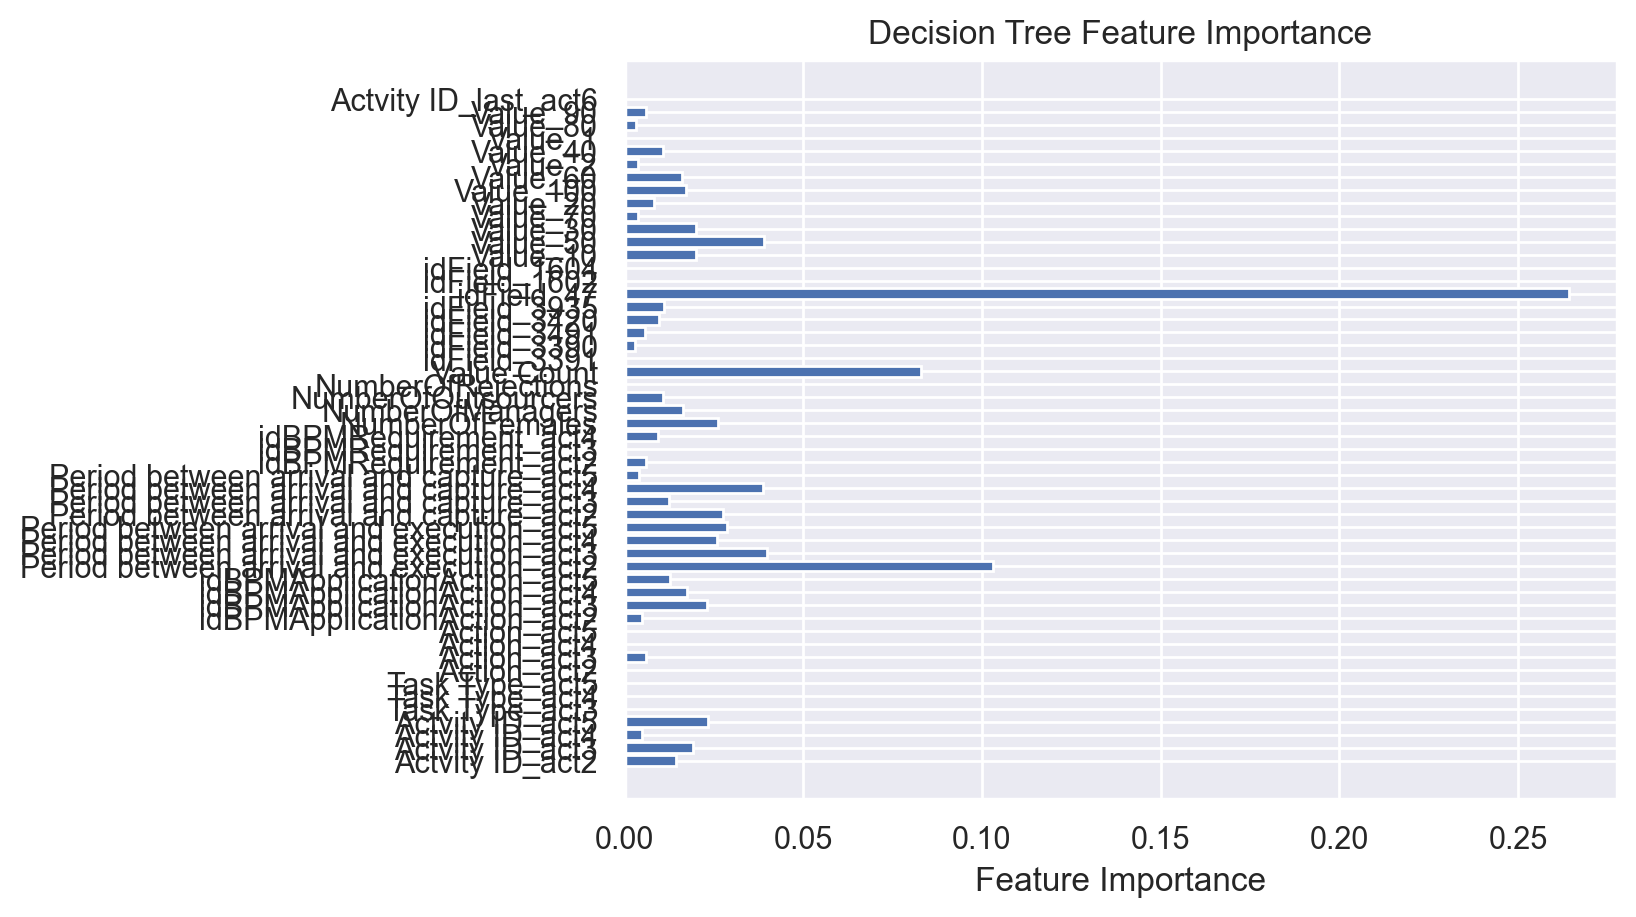

In [153]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_smote, y_smote)

#Get feature importances
feature_importances = clf.feature_importances_

decision_tree_eliminate = []

#Print feature importances
for feature, importance in zip(X_smote.columns, feature_importances):
    print(f"{feature}: {importance.round(3)}")
    if importance < 0.02:
        decision_tree_eliminate.append(feature)

plt.barh(X_smote.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [154]:
#List with features to eliminate 
decision_tree_eliminate

['Actvity ID_act2',
 'Actvity ID_act3',
 'Actvity ID_act4',
 'Task Type_act3',
 'Task Type_act4',
 'Task Type_act5',
 'Action_act2',
 'Action_act3',
 'Action_act4',
 'Action_act5',
 'idBPMApplicationAction_act2',
 'idBPMApplicationAction_act4',
 'idBPMApplicationAction_act5',
 'Period between arrival and capture_act3',
 'Period between arrival and capture_act5',
 'idBPMRequirement_act2',
 'idBPMRequirement_act3',
 'idBPMRequirement_act4',
 'NumberOfManagers',
 'NumberOfOutsourcers',
 'NumberOfRejections',
 'idField_3391',
 'idField_3390',
 'idField_3491',
 'idField_3420',
 'idField_3935',
 'idField_1602',
 'idField_1604',
 'Value_10',
 'Value_30',
 'Value_70',
 'Value_20',
 'Value_100',
 'Value_60',
 'Value_2',
 'Value_40',
 'Value_1',
 'Value_80',
 'Value_90',
 'Actvity ID_last_act6']

<a class="anchor" id="selectfin">

#### Final Feature Selection
###### [Go back to Contents](#top)
</a>

Finally, we developed a votting system. If the variable was eliminated for at least 2 of the methods used, then we will drop it.

In [155]:
#Combine all the lists into one list
all_eliminate = (
    rfe_eliminate
    + lasso_eliminate
    + decision_tree_eliminate
    + spearman_eliminate)

element_counts = Counter(all_eliminate)

#Minimum number of lists an element should appear in to drop it
min_appearances = 2

common_elements = [element for element, count in element_counts.items() if count >= min_appearances]
print(common_elements)

['Actvity ID_act2', 'Actvity ID_act3', 'Actvity ID_act4', 'Task Type_act3', 'Task Type_act4', 'Task Type_act5', 'Action_act2', 'Action_act3', 'Action_act4', 'Action_act5', 'idBPMApplicationAction_act2', 'idBPMApplicationAction_act4', 'idBPMApplicationAction_act5', 'Period between arrival and execution_act2', 'Period between arrival and execution_act3', 'Period between arrival and execution_act4', 'Period between arrival and execution_act5', 'Period between arrival and capture_act3', 'Period between arrival and capture_act4', 'Period between arrival and capture_act5', 'idBPMRequirement_act2', 'idBPMRequirement_act3', 'idBPMRequirement_act4', 'NumberOfFemales', 'NumberOfManagers', 'NumberOfOutsourcers', 'NumberOfRejections', 'idField_3391', 'idField_3390', 'idField_3420', 'idField_3935', 'idField_1604', 'Value_10', 'Value_30', 'Value_70', 'Value_20', 'Value_100', 'Value_2', 'Value_40', 'Value_1', 'Value_80', 'Value_90', 'Period between arrival and capture_act2', 'idField_1602', 'Value_60

In [156]:
#Droping the variables in all necessary dataframes
X_train.drop(common_elements, axis=1, inplace=True)
X_val.drop(common_elements, axis=1, inplace=True)
X_smote.drop(common_elements, axis=1, inplace=True)

In [157]:
#Checking how many columns were left 
len(X_smote.columns)

6

In [158]:
#Which columns were left 
X_smote.columns

Index(['Actvity ID_act5', 'idBPMApplicationAction_act3', 'Value Count',
       'idField_3491', 'idField_47', 'Value_50'],
      dtype='object')

<a class="anchor" id="base">

#### Baseline Modeling
###### [Go back to Contents](#top)
</a>

Now, we reached the modelling phase. Firstly we are going to see the results on our train set with 2 simple and not yet tunned models. 

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score

#Multiclass scoring metric
scoring_metric = make_scorer(f1_score, average='weighted')

#List of classifiers
clf_list = [('Gaussian Naive Bayes', GaussianNB()),
            ('Logistic Regression', LogisticRegression(random_state=42))]

cv_base_mean, cv_std = [], []
for clf in clf_list:

    cv = cross_val_score(estimator=clf[1],
                         X=X_smote,
                         y=y_smote,
                         scoring=scoring_metric,
                         cv=5,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (Weighted Recall):')

for i in range(len(clf_list)):
    print('   {}: {}'.format(clf_list[i][0], np.round(cv_base_mean[i], 2)))

Baseline Models (Weighted Recall):
   Gaussian Naive Bayes: 0.55
   Logistic Regression: 0.66


<a class="anchor" id="tun">

#### Model Tunning
###### [Go back to Contents](#top)
</a>

To find the best parameters for the Models we are going to use Random Search. Unlike GridSearch, instead of systematically checking every possible combination, it randomly selects configurations to try out sees the model performance wity those parameters. This approach is normally more efficient and less computationally intensive, especially when the search space is large.

### Functions 

In [160]:
#Confusion Matrix and Model Assessment Metrics
def metrics(y_train, pred_train):
    print('___________________________________________________________________________________________________________')
    print('                                                TRAIN                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

### Logistic Regression

Logistics Regression uses Logistic function to map inputs to probabilities between 0 and 1, making it widely used for its simplicity and interpretability.

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

#Logistic Regression classifier
lr = LogisticRegression(random_state=42)

#Search Space 
param_distributions = {
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),  # 20 values between 1e-4 and 1e4
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10),  # Only useful if penalty is 'elasticnet'
    'class_weight': ['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lr_clf = RandomizedSearchCV(estimator=lr,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=100,  
                            n_jobs=-1,
                            random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_lr_clf = lr_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lr_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100, 'l1_ratio': 0.5555555555555556, 'class_weight': 'balanced', 'C': 11.288378916846883}

Best parameters found by RandomizedSearchCV: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100, 'l1_ratio': 0.5555555555555556, 'class_weight': 'balanced', 'C': 11.288378916846883}


In [162]:
#Defining the model with the best parameters found
lr_best = LogisticRegression(
    solver='saga', 
    penalty='elasticnet', 
    max_iter=100, 
    l1_ratio=0.5555555555555556, 
    C=11.288378916846883,
    class_weight='balanced',
    random_state=42
)

#Fit the new Logistic Regression model with the best parameters
lr_fit = lr_best.fit(X_smote, y_smote)
lr_pred_train = lr_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lr_pred_train)

print('f1_train:', f1_score(y_smote, lr_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.77      0.58        48
           1       0.95      0.74      0.83       193
           2       0.53      0.72      0.61       167
           3       0.75      0.61      0.68       270

    accuracy                           0.69       678
   macro avg       0.68      0.71      0.68       678
weighted avg       0.73      0.69      0.70       678

[[ 37   0   9   2]
 [  6 142  24  21]
 [  7   7 121  32]
 [ 29   0  75 166]]
f1_train: 0.7


### SVC

SVC aims to find the best hyperplane separating classes of the target variable. By maximizing the margin between classes, it handles linear and non-linear data using kernel functions.

In [163]:
#Define the SVC classifier
svc = SVC(probability=True, random_state=42)

#Define the expanded parameter grid (Search Space)
param_distributions = {
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Including more values for gamma
    'C': np.logspace(-2, 2, 10),  # 10 values between 0.01 and 100
    'class_weight': ['balanced']
}

#Sscoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
svc_clf = RandomizedSearchCV(estimator=svc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=50,  
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_svc_clf = svc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_svc_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 1.0, 'class_weight': 'balanced', 'C': 35.93813663804626}

Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 1.0, 'class_weight': 'balanced', 'C': 35.93813663804626}


In [164]:
#Defining the model with the best parameters found
svc_best = SVC(kernel='rbf',
               gamma= 1.0,
               C= 35.93813663804626,
               probability=True,
               class_weight='balanced',
               random_state=42)

#Fit the new Logistic Regression model with the best parameters
svc_fit = svc_best.fit(X_smote, y_smote)
svc_pred_train = svc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, svc_pred_train)

print('f1_train:', f1_score(y_smote, svc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        48
           1       0.99      0.73      0.84       193
           2       0.55      0.83      0.66       167
           3       0.80      0.66      0.72       270

    accuracy                           0.73       678
   macro avg       0.75      0.76      0.74       678
weighted avg       0.78      0.73      0.74       678

[[ 39   0   9   0]
 [  2 141  29  21]
 [  3   1 138  25]
 [ 16   0  75 179]]
f1_train: 0.74


### Random Forest 

Random Forest is an ensemble learning method that builds multiple decision trees and merges them for better accuracy and stability. By majority voting (in classification problems) across the trees, it reduces overfitting and improves predictive performance. 

In [165]:
#Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': np.arange(5, 21, 5),
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'class_weight': ['balanced']
}

#Define the scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
rf_clf = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=70,  
                            n_jobs=-1,
                            random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_rf_clf = rf_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_rf_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}

Best parameters found by RandomizedSearchCV: {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}


In [166]:
#Define the best Random Forest model
rf_best = RandomForestClassifier(n_estimators= 400,
                                  min_samples_split= 4,
                                  min_samples_leaf= 1, 
                                  max_features= 'auto', 
                                  max_depth= 5, 
                                  criterion= 'entropy', 
                                  bootstrap= False,
                                  class_weight='balanced',
                                  random_state=42
)

#Fit the new Random Forest model with the best parameters
rf_fit = rf_best.fit(X_smote, y_smote)
rf_pred_train = rf_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, rf_pred_train)

print('f1_train:', f1_score(y_smote, rf_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.81      0.63        48
           1       0.99      0.73      0.84       193
           2       0.55      0.76      0.64       167
           3       0.76      0.64      0.70       270

    accuracy                           0.71       678
   macro avg       0.70      0.74      0.70       678
weighted avg       0.76      0.71      0.72       678

[[ 39   0   9   0]
 [  5 141  25  22]
 [  7   1 127  32]
 [ 25   0  71 174]]
f1_train: 0.72


### Gradient Boost

Gradient Boosting builds models sequentially. Each new model corrects the errors of the previous ones, combining them for better accuracy. At the end, for classification tasks it uses weighted voting to determine the final class label of the target variable.

In [167]:
#Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=15)

#Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 300, 600, 1000],
    'subsample': [0.66, 0.75, 0.85, 1.0],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],  
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_iter_no_change': [10, 20, 30],
    'validation_fraction': [0.1, 0.2, 0.3],
    'tol': [0.0001, 0.001, 0.01]
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
gbc_clf = RandomizedSearchCV(estimator=gbc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=70,  # Number of parameter settings sampled
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_gbc_clf = gbc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_gbc_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.2, 'tol': 0.001, 'subsample': 1.0, 'n_iter_no_change': 20, 'n_estimators': 1000, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}

Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.2, 'tol': 0.001, 'subsample': 1.0, 'n_iter_no_change': 20, 'n_estimators': 1000, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}


In [168]:
#Model with the best parameters
gbc_best = GradientBoostingClassifier(
    validation_fraction=0.2,
    tol=0.001,
    subsample=1.0,
    n_iter_no_change=20,
    n_estimators=1000,
    min_samples_split=7,
    min_samples_leaf=5,
    max_features= None,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
#Fit the new Gradient Boosting Classifier model with the best parameters
gbc_fit=gbc_best.fit(X_smote, y_smote)
gbc_pred_train = gbc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, gbc_pred_train)

#Print F1 score for the training set
print('f1_train:', f1_score(y_smote, gbc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        48
           1       0.97      0.74      0.84       193
           2       0.57      0.70      0.63       167
           3       0.73      0.77      0.75       270

    accuracy                           0.74       678
   macro avg       0.77      0.72      0.74       678
weighted avg       0.76      0.74      0.74       678

[[ 32   0   9   7]
 [  2 142  23  26]
 [  0   4 117  46]
 [  5   0  56 209]]
f1_train: 0.74


### XGBOOST

XGBOOST is an advanced implementation of gradient boosting designed for speed and performance. It builds models sequentially, with each new model correcting the errors of the previous ones. 

In [169]:
#Define the XGBoost classifier
xgb = XGBClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': np.logspace(-3, 0, 10), 
    'max_depth': np.arange(3, 11),
    'reg_alpha': np.linspace(0, 1, 10),
    'reg_lambda': np.linspace(0, 1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 1, 10),
    'min_child_weight': np.arange(1, 11)
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
xgb_clf = RandomizedSearchCV(estimator=xgb,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=3,
                             n_iter=70,  
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_xgb_clf = xgb_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_xgb_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'subsample': 0.9, 'reg_lambda': 0.0, 'reg_alpha': 0.6666666666666666, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.046415888336127774, 'gamma': 0.0, 'colsample_bytree': 0.6}

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters found by RandomizedSearchCV: {'subsample': 0.9, 'reg_lambda': 0.0, 'reg_alpha': 0.6666666666666666, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.046415888336127774, 'gamma': 0.0, 'colsample_bytree': 0.6}


In [170]:
#Defining the model with the best parameters 
xgb_best = XGBClassifier(
    subsample=0.9,
    reg_lambda=0.0,
    reg_alpha=0.6666666666666666,
    n_estimators=150,
    min_child_weight=1,
    max_depth=6,
    learning_rate=0.046415888336127774,
    gamma=0.0,
    colsample_bytree=0.6,
    random_state=42
)

#Fit the new XGBoost model with the best parameters
xgb_fit = xgb_best.fit(X_smote, y_smote)
xgb_pred_train = xgb_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, xgb_pred_train)

print('f1_train:', f1_score(y_smote, xgb_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        48
           1       0.99      0.73      0.84       193
           2       0.61      0.68      0.64       167
           3       0.71      0.81      0.75       270

    accuracy                           0.74       678
   macro avg       0.78      0.72      0.74       678
weighted avg       0.77      0.74      0.75       678

[[ 32   0   9   7]
 [  2 141  18  32]
 [  0   1 114  52]
 [  5   0  47 218]]
f1_train: 0.75


### LightGBM

LightGBM is a fast, high-performance implementation of gradient boosting. It builds models sequentially, optimizing for speed and memory efficiency by using a histogram-based method in which data is bucketed into bins using a histogram of the distributions. In classification, it uses weighted voting to determine the final class label.

In [171]:
#Define the LGBMClassifier
lgbmc = LGBMClassifier(random_state=42)

#Define the parameter grid
param_distributions = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lgbmc_clf = RandomizedSearchCV(estimator=lgbmc,
                               param_distributions=param_distributions,
                               scoring=scoring_metric,
                               cv=5,
                               verbose=False,
                               n_iter=70,  
                               n_jobs=-1,
                               random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_lgbmc_clf = lgbmc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lgbmc_clf.best_params_)

#Best parameters found by RandomizedSearchCV: {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 10, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.01, 'feature_fraction': 0.5}


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 678, number of used features: 6
[LightGBM] [Info] Start training from score -2.647946
[LightGBM] [Info] Start training from score -1.256457
[LightGBM] [Info] Start training from score -1.401153
[LightGBM] [Info] Start training from score -0.920725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [172]:
#Defining the model with the best parameters 
lgbmc_best = LGBMClassifier(
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=10,
    n_estimators=200,
    min_child_samples=5,
    max_depth=5,
    learning_rate=0.01,
    feature_fraction=0.5,
    random_state=42
)


#Fit the new LGBM model with the best parameters
lgbmc_fit = lgbmc_best.fit(X_smote, y_smote)
lgbmc_pred_train = lgbmc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lgbmc_pred_train)

print('f1_train:', f1_score(y_smote, lgbmc_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 678, number of used features: 6
[LightGBM] [Info] Start training from score -2.647946
[LightGBM] [Info] Start training from score -1.256457
[LightGBM] [Info] Start training from score -1.401153
[LightGBM] [Info] Start training from score -0.920725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

### Ensemble

Voting classifiers are ensemble methods that combine multiple different models to improve classification performance. We are using Soft Voting ensemble, where the final class label is determined by the weighted average of predicted probabilities from the models used.

In [177]:
from sklearn.ensemble import VotingClassifier
#Define the estimators for the soft voting ensemble
estimators = [
    ('rf', rf_fit),
    ('gb', gbc_fit),
    ('xgb', xgb_fit),
    ('lgbm', lgbmc_fit),
    ('lr', lr_fit),
    ('svc', svc_fit)
]

#Create the soft voting ensemble
soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

#Fit the ensemble to the training data
ensemble_model=soft_voting_clf.fit(X_smote, y_smote)

#Predict on the training set
soft_voting_pred_train = ensemble_model.predict(X_smote)

#Assess the ensemble's performance on the training set
metrics(y_smote, soft_voting_pred_train)

print('f1_train:', f1_score(y_smote, soft_voting_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 678, number of used features: 6
[LightGBM] [Info] Start training from score -2.647946
[LightGBM] [Info] Start training from score -1.256457
[LightGBM] [Info] Start training from score -1.401153
[LightGBM] [Info] Start training from score -0.920725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

<a class="anchor" id="impor">

### Models Feature Importance
###### [Go back to Contents](#top)
</a>

In this section, we will examine the variables that contributed most significantly to predicting the target variable in each model

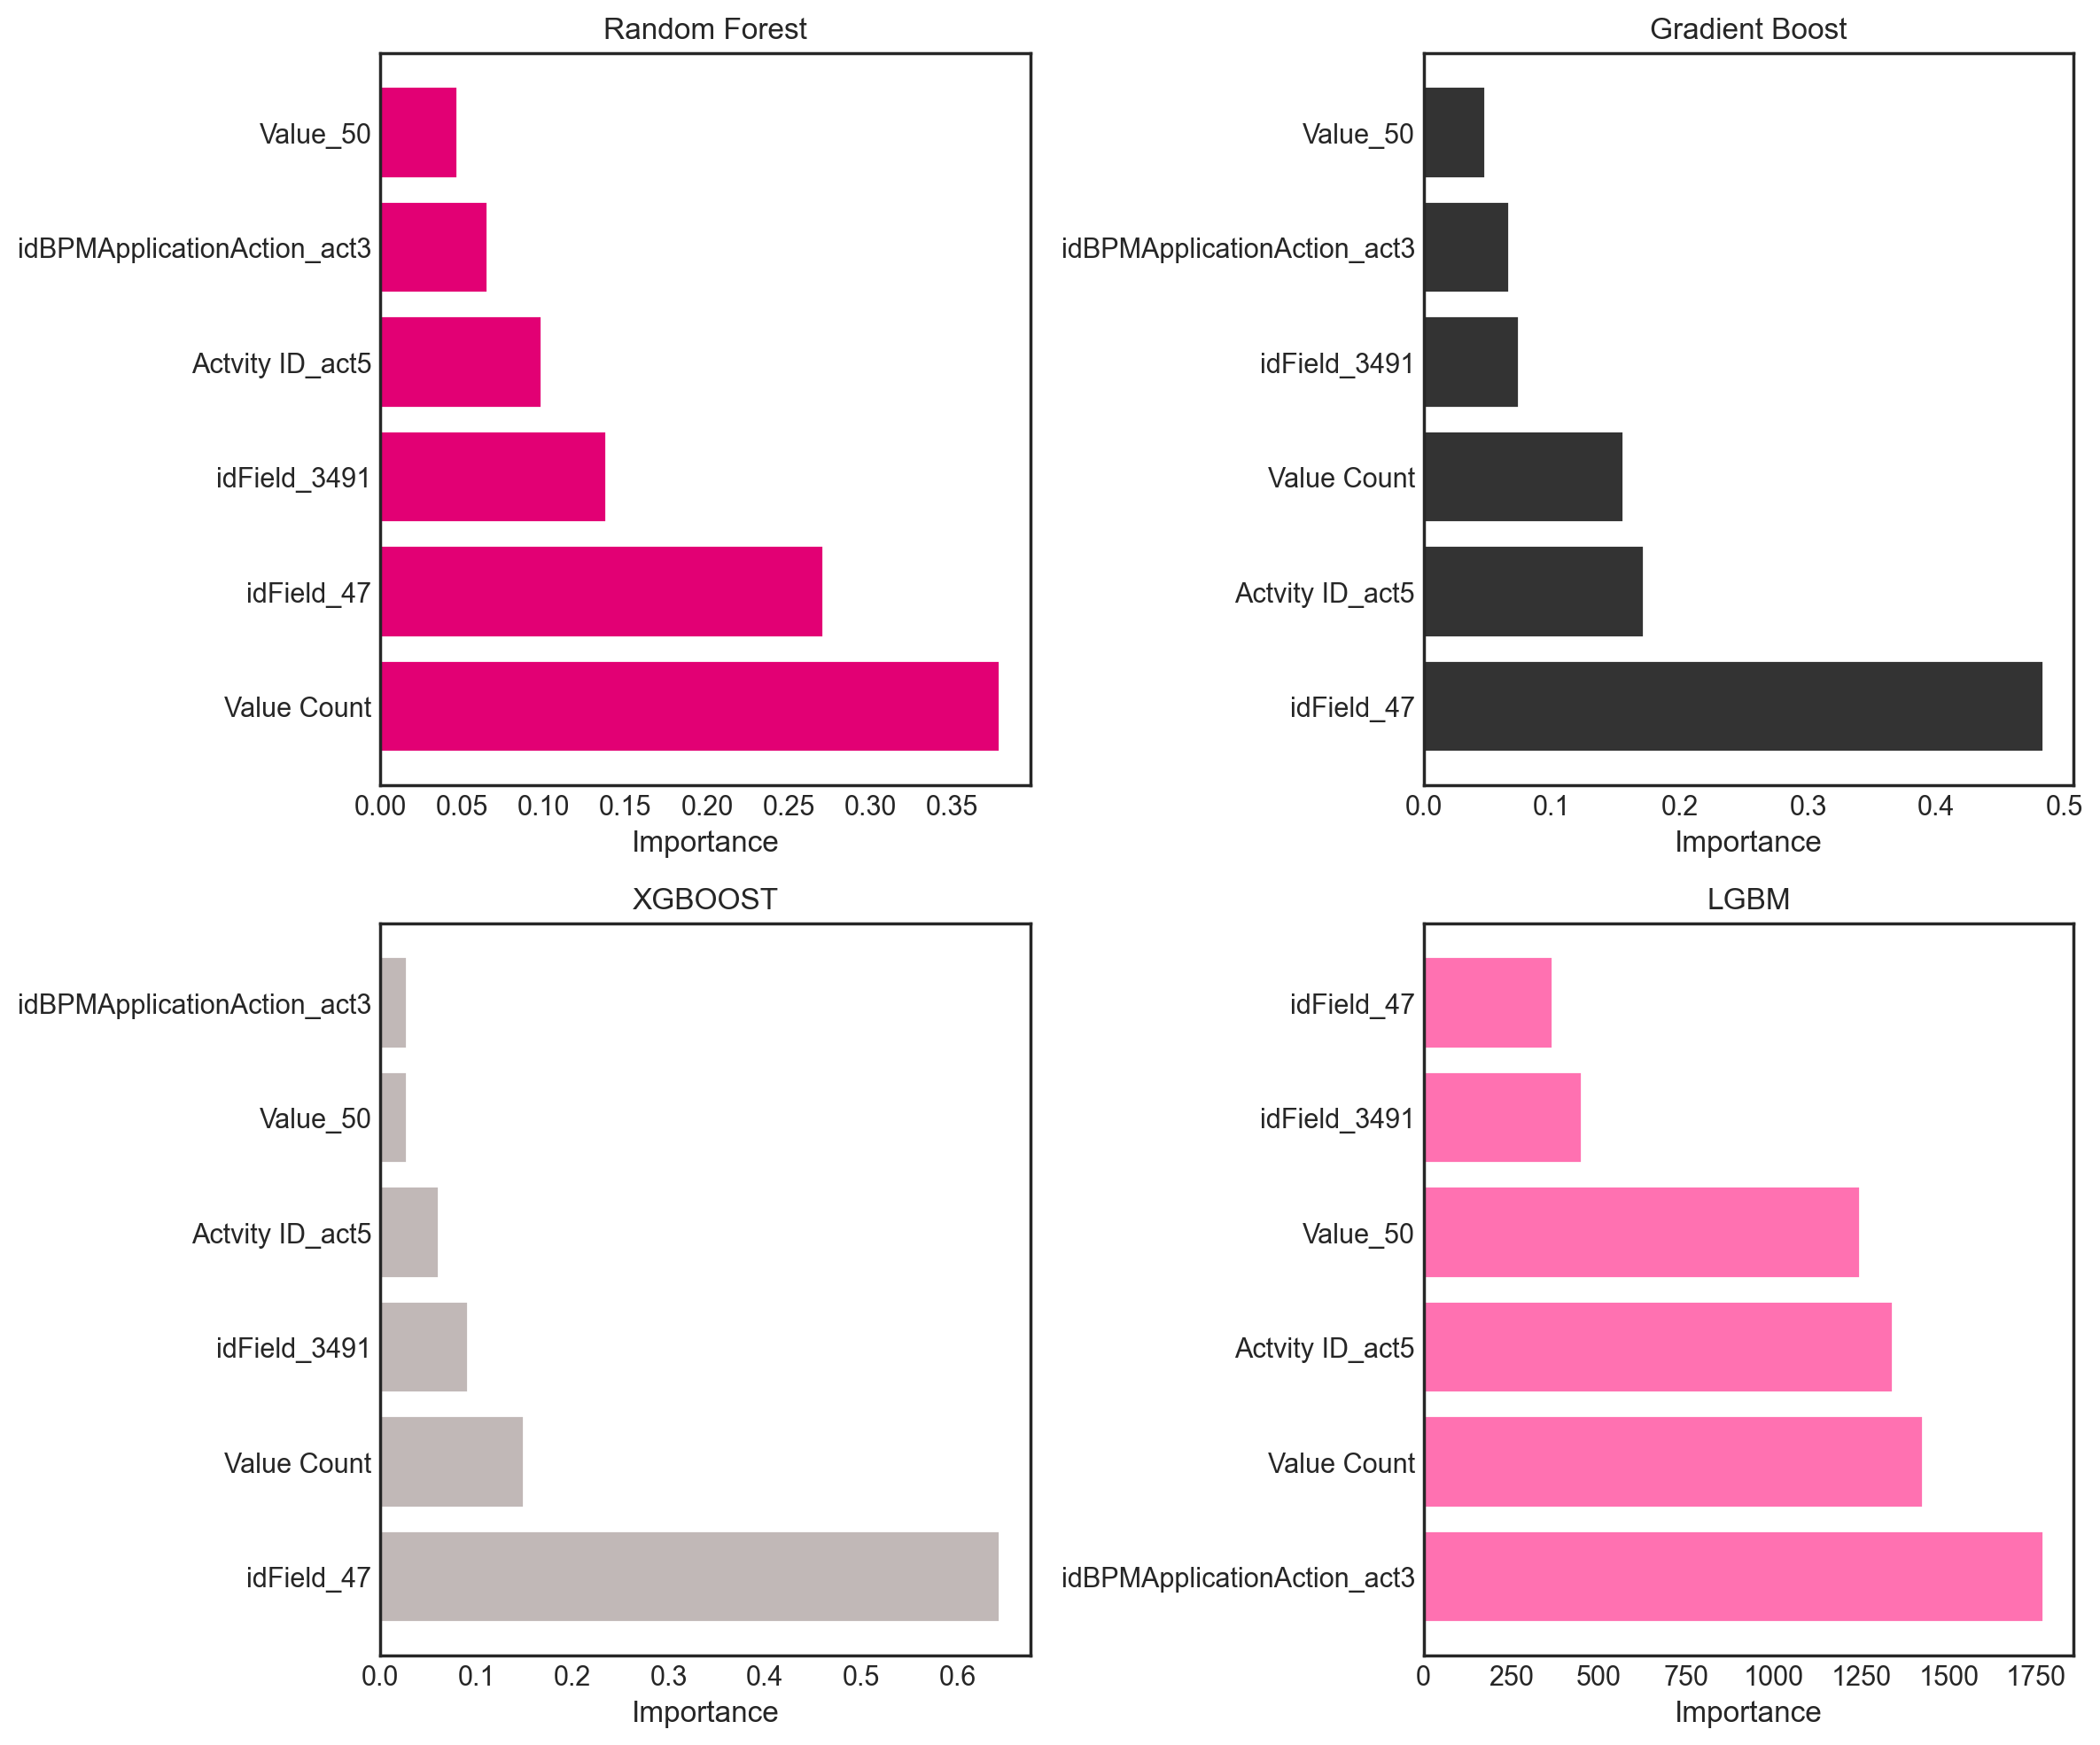

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Set white background
plt.style.use("seaborn-v0_8-white")

# Define the models and their names
models = {
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'XGBOOST': xgb_fit,
    'LGBM': lgbmc_fit
}

# Define custom colors
colors = {"magenta": "#E20074", "dark_gray": "#333333", "light_gray": "#C1B8B7", "pink": "#FF71B1"}

# Assuming X_smote is a DataFrame, get the feature names
feature_names = X_smote.columns if hasattr(X_smote, 'columns') else [f'Feature {i}' for i in range(X_smote.shape[1])]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot feature importance for each model
for ax, (name, model), color in zip(axs.flatten(), models.items(), colors.values()):
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_names = np.array(feature_names)[sorted_indices]
    
    ax.barh(range(X_smote.shape[1]), feature_importance[sorted_indices], color=color)
    ax.set_yticks(range(X_smote.shape[1]))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_title(name)
    ax.set_xlabel('Importance')

plt.tight_layout()
plt.show()

<a class="anchor" id="TRAIN">

### Train Metrics Comparison 

###### [Go back to Contents](#top)
</a>

Here we can compare the diferent models performance on the train dataset using Precision, Recall and F1_score.
- Precision measures the proportion of correctly predicted positive instances (true positives) among all instances predicted as positive (true positives + false positives).
- Recall measures the proportion of correctly predicted positive instances (true positives) among all actual positive instances (true positives + false negatives). It focuses on the ability of the classifier to find all the positive instances.
- The F1 Score provides a single score that balances both precision and recall. It reaches its best value at 1 and worst at 0. It is a useful metric when we want to find a balance between precision and recall, especially when there is an uneven class distribution, that is our projects case.

In [179]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

#Our models definition
models = {
    'Logistic Regression': lr_fit,
    'SVC': svc_fit,
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'LGBM': lgbmc_fit,
    'Ensemble': ensemble_model,
    'XGBOOST': xgb_fit,
}

#Initialize empty lists to store metrics
precision = []
recall = []
f1 = []

#Calculate metrics for each model
for name, model in models.items():
    pred_train = model.predict(X_smote)
    
    precision_score_train = precision_score(y_smote, pred_train, average='weighted')
    recall_score_train = recall_score(y_smote, pred_train, average='weighted')
    f1_score_train = f1_score(y_smote, pred_train, average='weighted')

    precision.append(precision_score_train)
    recall.append(recall_score_train)
    f1.append(f1_score_train)

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Model': list(models.keys()),
                           'Weighted Precision': precision,
                           'Weighted Recall': recall,
                           'Weighted F1 Score': f1})

metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


Model  Weighted Precision  Weighted Recall  Weighted F1 Score
0  Logistic Regression            0.733716         0.687316           0.697433
1                  SVC            0.780911         0.733038           0.741406
2        Random Forest            0.757733         0.709440           0.719240
3       Gradient Boost            0.764523         0.737463           0.743811
4                 LGBM            0.767108         0.741888           0.745330
5             Ensemble            0.775356         0.744838           0.751935
6              XGBOOST            0.771057         0.744838           0.749776

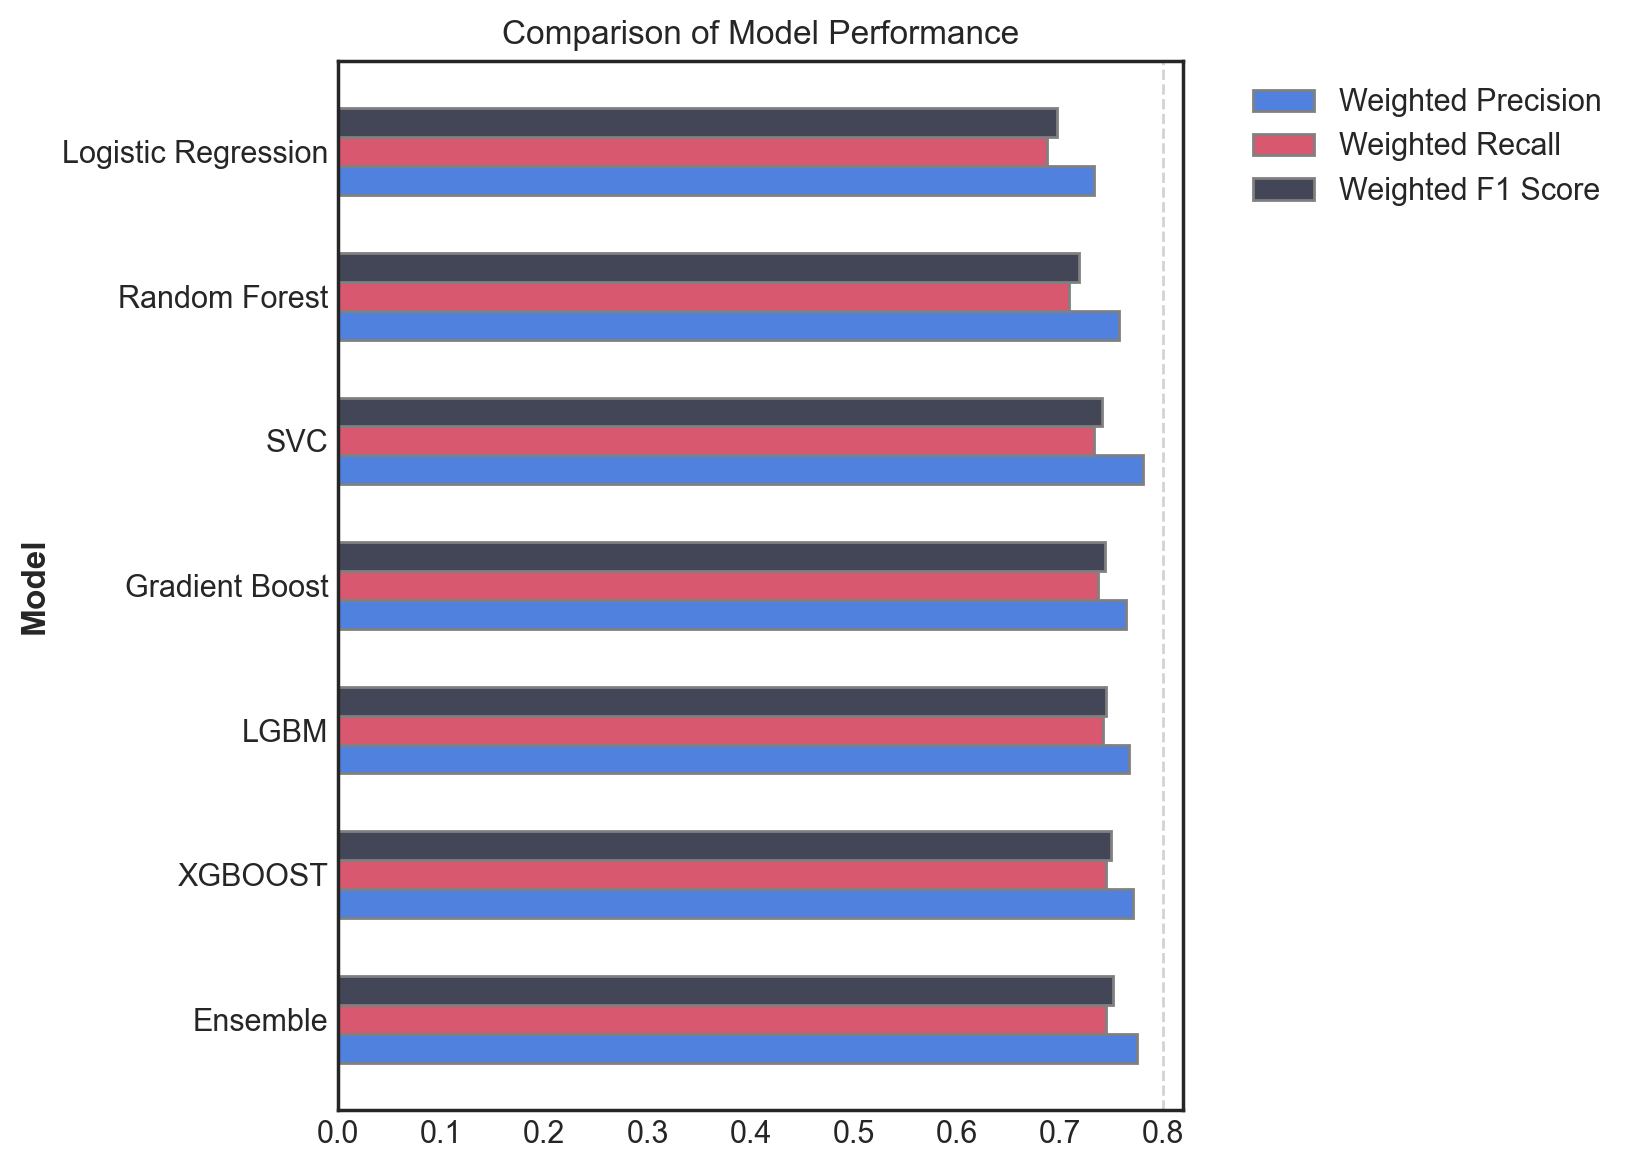

In [180]:
#Sort the DataFrame by 'Weighted F1 Score' in descending order
metrics_df = metrics_df.sort_values(by='Weighted F1 Score', ascending=False)

#Set the width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars horizontally
ax.barh(r1, metrics_df['Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Weighted Precision')
ax.barh(r2, metrics_df['Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Weighted Recall')
ax.barh(r3, metrics_df['Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Weighted F1 Score')

#Adding a light grey ticked line at 0.65 to provide better comparison
ax.axvline(x=0.8, color='lightgrey', linestyle='dashed', linewidth=1)

#yticks on the middle of the group bars
ax.set_ylabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(metrics_df))])
ax.set_yticklabels(metrics_df['Model'])

#Legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.title('Comparison of Model Performance')
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()

<a class="anchor" id="VAL">

### Validation Implementation

###### [Go back to Contents](#top)
</a>

In this section we are going to repeat the process for the validation dataset

In [181]:
#Initialize lists to store metrics for validation set
val_precision = []
val_recall = []
val_f1 = []

#Calculate metrics for each model on validation set
for name, model in models.items():
    pred_val = model.predict(X_val)
    
    precision_val = precision_score(y_val, pred_val, average='weighted')
    recall_val = recall_score(y_val, pred_val, average='weighted')
    f1_val = f1_score(y_val, pred_val, average='weighted')

    val_precision.append(precision_val)
    val_recall.append(recall_val)
    val_f1.append(f1_val)

#Create a DataFrame to store the metrics for validation set
val_metrics_df = pd.DataFrame({'Model': list(models.keys()),
                               'Val Weighted Precision': val_precision,
                               'Val Weighted Recall': val_recall,
                               'Val Weighted F1 Score': val_f1})

#Print the DataFrame
val_metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


Model  Val Weighted Precision  Val Weighted Recall  \
0  Logistic Regression                0.742689             0.694118   
1                  SVC                0.741881             0.700000   
2        Random Forest                0.758463             0.711765   
3       Gradient Boost                0.757427             0.735294   
4                 LGBM                0.757971             0.741176   
5             Ensemble                0.759833             0.735294   
6              XGBOOST                0.761496             0.741176   

   Val Weighted F1 Score  
0               0.703721  
1               0.707657  
2               0.719845  
3               0.740132  
4               0.743728  
5               0.741192  
6               0.744937

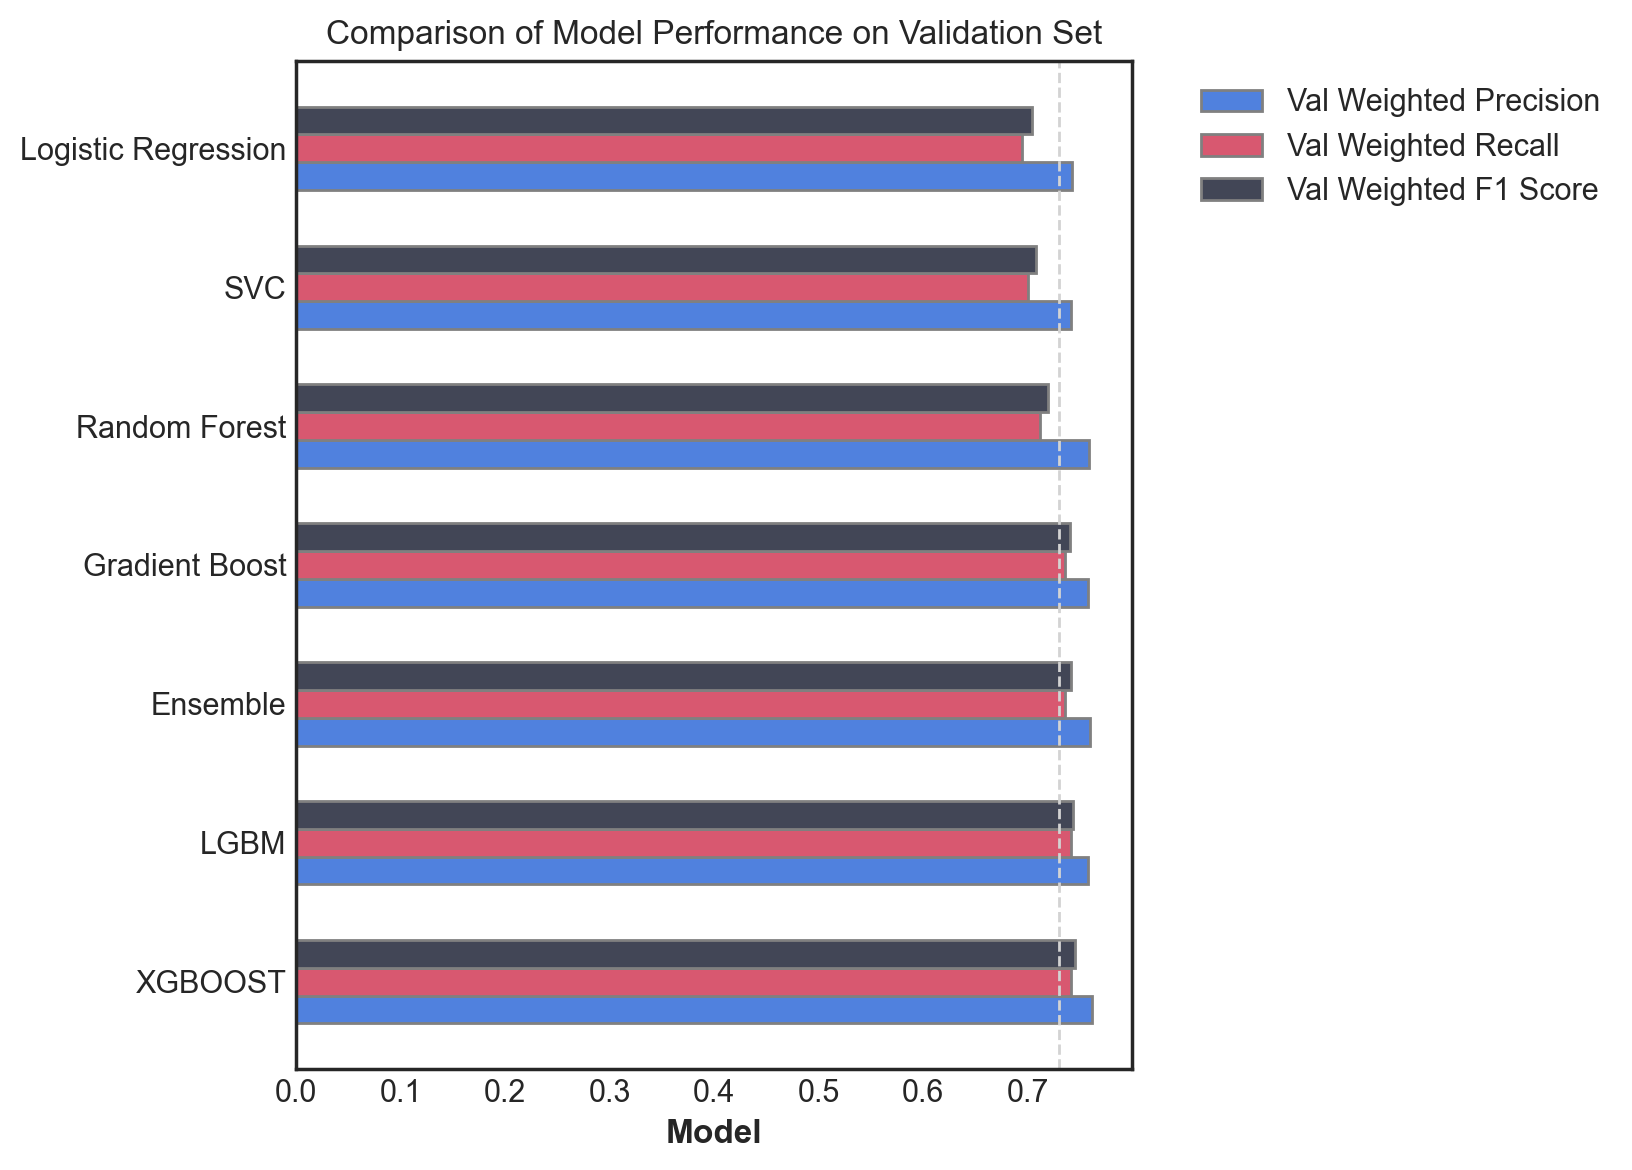

In [182]:
#Sort the DataFrame by 'Val Weighted F1 Score' in descending order
val_metrics_df = val_metrics_df.sort_values(by='Val Weighted F1 Score', ascending=False)

#Width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(val_metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars for validation set
ax.barh(r1, val_metrics_df['Val Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Val Weighted Precision')
ax.barh(r2, val_metrics_df['Val Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Val Weighted Recall')
ax.barh(r3, val_metrics_df['Val Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Val Weighted F1 Score')

#Light grey ticked line at 0.65
ax.axvline(x=0.73, color='lightgrey', linestyle='dashed', linewidth=1)

#xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(val_metrics_df))])
ax.set_yticklabels(val_metrics_df['Model'])

#Legend
ax.legend()

#Add legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.title('Comparison of Model Performance on Validation Set')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()

<a class="anchor" id="fin">

### Final Model Selection

###### [Go back to Contents](#top)
</a>

We will select the final model based on two criteria: firstly, the model with the least amount of overfitting, indicated by the closest F1 score between the training and validation sets, since we want a model that generalizes well on unseen data. Secondly, prioritizing the model with the highest F1 score on the validation set. We choose F1 score as our primary metric because it effectively evaluates model performance in imbalanced classification problems.

In [183]:
#Calculate the differences between train and validation F1 scores
f1_diff = [abs(train - val) for train, val in zip(f1, val_f1)]

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Precision': precision,
    'Train Recall': recall,
    'Train F1 Score': f1,
    'Validation Precision': val_precision,
    'Validation Recall': val_recall,
    'Validation F1 Score': val_f1,
    'F1 Score Difference': f1_diff
})

#Sort the DataFrame by F1 Score Difference (ascending) and Validation F1 Score (descending)
metrics_df.sort_values(by=['F1 Score Difference', 'Validation F1 Score'], ascending=[True, False], inplace=True)

#Select the best model
best_model_name = metrics_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model_metrics = metrics_df.iloc[0]

#Print the best model and its scores
print(f"The best model is {best_model_name}")
print(f"Train F1 Score: {best_model_metrics['Train F1 Score']}")
print(f"Validation F1 Score: {best_model_metrics['Validation F1 Score']}")
print(f"F1 Score Difference: {best_model_metrics['F1 Score Difference']}")

#Display the DataFrame
metrics_df

The best model is Random Forest
Train F1 Score: 0.7192399642572632
Validation F1 Score: 0.7198450136342441
F1 Score Difference: 0.0006050493769809151


Model  Train Precision  Train Recall  Train F1 Score  \
2        Random Forest         0.757733      0.709440        0.719240   
4                 LGBM         0.767108      0.741888        0.745330   
3       Gradient Boost         0.764523      0.737463        0.743811   
6              XGBOOST         0.771057      0.744838        0.749776   
0  Logistic Regression         0.733716      0.687316        0.697433   
5             Ensemble         0.775356      0.744838        0.751935   
1                  SVC         0.780911      0.733038        0.741406   

   Validation Precision  Validation Recall  Validation F1 Score  \
2              0.758463           0.711765             0.719845   
4              0.757971           0.741176             0.743728   
3              0.757427           0.735294             0.740132   
6              0.761496           0.741176             0.744937   
0              0.742689           0.694118             0.703721   
5              0.759833           0.735294             0.741192   
1              0.741881           0.700000             0.707657   

   F1 Score Difference  
2             0.000605  
4             0.001601  
3             0.003680  
6             0.004840  
0             0.006288  
5             0.010743  
1             0.033749

Here, we are going to update the best model, since the overfit difference is small and we achieve better F1 results with LGBM.

In [192]:
best_model_name = 'LGBM'
best_model = models[best_model_name]
best_model_metrics = metrics_df[metrics_df['Model'] == best_model_name].iloc[0]

# Print the best model and its scores
print(f"The best model is {best_model_name}")
print(f"Train F1 Score: {best_model_metrics['Train F1 Score']}")
print(f"Validation F1 Score: {best_model_metrics['Validation F1 Score']}")
print(f"F1 Score Difference: {best_model_metrics['F1 Score Difference']}")

The best model is LGBM
Train F1 Score: 0.7453296060095247
Validation F1 Score: 0.7437282381143496
F1 Score Difference: 0.0016013678951750654


<a class="anchor" id="int">

### Final Model Interpretation

###### [Go back to Contents](#top)
</a>

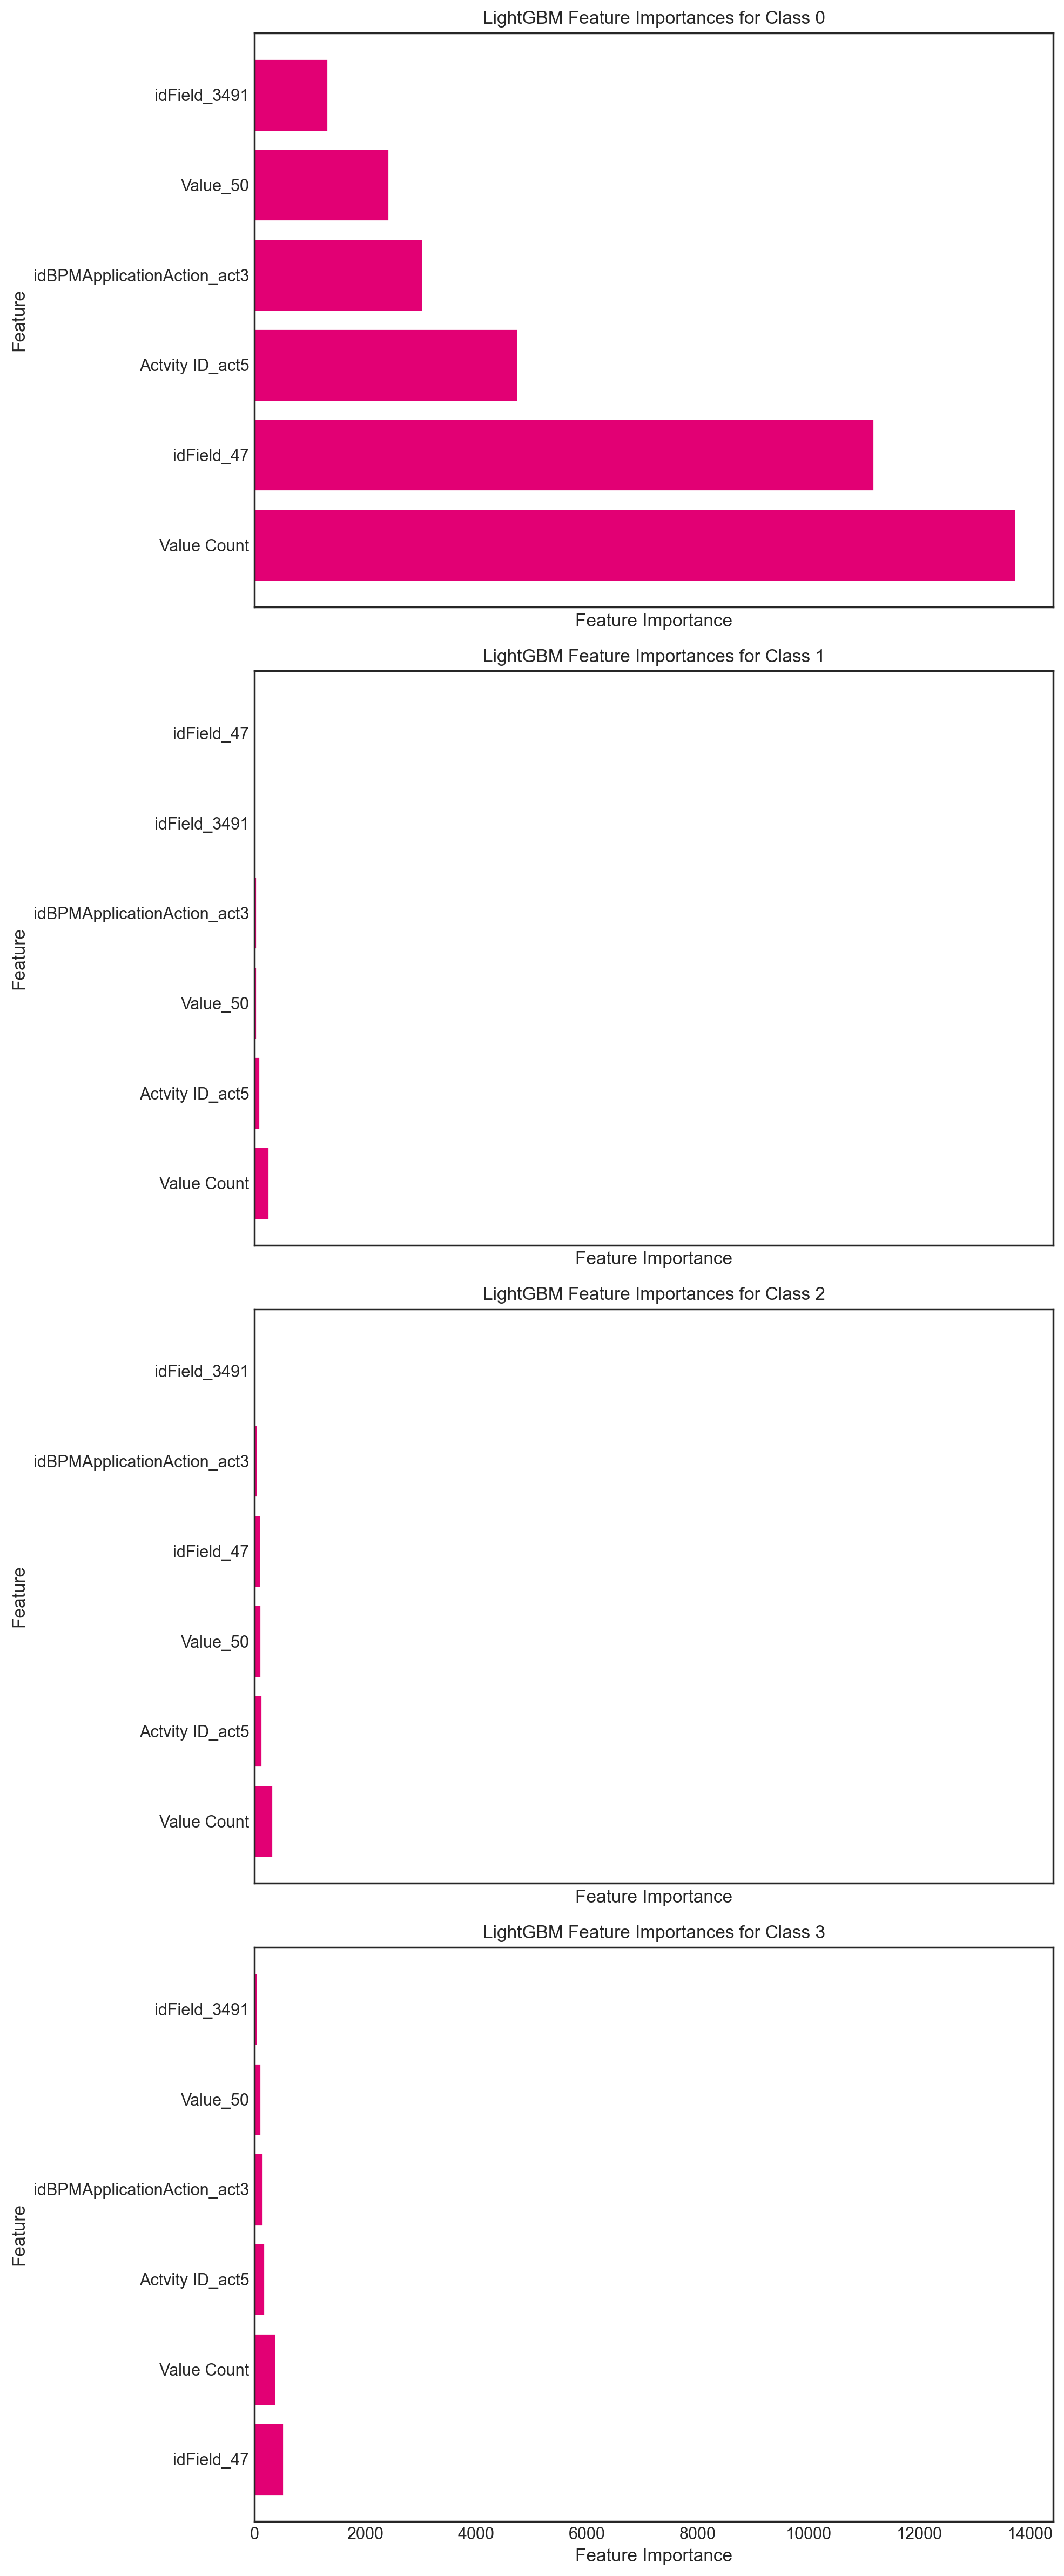

In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb

# Assuming lgbmc_fit is your trained LightGBM model
features = X_smote.columns

# Get the number of classes from the model
num_classes = lgbmc_fit.booster_.num_model_per_iteration()

# Create subplots to display feature importances for each class
fig, axes = plt.subplots(num_classes, 1, figsize=(10, 6 * num_classes), sharex=True)

for i in range(num_classes):
    # Extract feature importances for the i-th class
    importances = lgbmc_fit.booster_.feature_importance(importance_type='gain', iteration=i)
    
    # Create a DataFrame to hold feature importances
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })
    
    # Sort the DataFrame by the absolute value of importances
    importances_df['abs_importance'] = np.abs(importances_df['Importance'])
    importances_df = importances_df.sort_values(by='abs_importance', ascending=False)
    
    # Plot the feature importances
    colors = np.where(importances_df['Importance'] > 0, "#E20074", "#333333")
    axes[i].barh(importances_df['Feature'], importances_df['Importance'], color=colors)
    axes[i].set_xlabel('Feature Importance')
    axes[i].set_ylabel('Feature')
    axes[i].set_title(f'LightGBM Feature Importances for Class {i}')

plt.tight_layout()
plt.show()

## Feature Importance Interpretation
- It was noticed more importance for the variables that belong to class 0, having 'Value Count' and 'idField_47' with the highest values